In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

Importing track features and user's behaviour then meging two data frames by common primary key

# User behaviour

In [ ]:
User_behaviour=pd.read_csv('log_mini.csv')

In [ ]:
User_behaviour.rename(columns = {'track_id_clean':'track_id'}, inplace = True) 

In [ ]:
User_behaviour.head()

session_id  session_position  session_length  \
0  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 1              20   
1  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 2              20   
2  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 3              20   
3  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 4              20   
4  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 5              20   

                                 track_id  skip_1  skip_2  skip_3  \
0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
1  t_9099cd7b-c238-47b7-9381-f23f2c1d1043   False   False   False   
2  t_fc5df5ba-5396-49a7-8b29-35d0d28249e0   False   False   False   
3  t_23cff8d6-d874-4b20-83dc-94e450e8aa20   False   False   False   
4  t_64f3743c-f624-46bb-a579-0f3f9a07a123   False   False   False   

   not_skipped  context_switch  no_pause_before_play  ...  \
0         True               0                     0  ...   
1         True               0                     1  ...   
2         True               0                     1  ...   
3         True               0                     1  ...   
4         True               0                     1  ...   

   long_pause_before_play  hist_user_behavior_n_seekfwd  \
0                       0                             0   
1                       0                             0   
2                       0                             0   
3                       0                             0   
4                       0                             0   

   hist_user_behavior_n_seekback  hist_user_behavior_is_shuffle  hour_of_day  \
0                              0                           True           16   
1                              0                           True           16   
2                              0                           True           16   
3                              0                           True           16   
4                              0                           True           16   

         date premium        context_type hist_user_behavior_reason_start  \
0  2018-07-15    True  editorial_playlist                       trackdone   
1  2018-07-15    True  editorial_playlist                       trackdone   
2  2018-07-15    True  editorial_playlist                       trackdone   
3  2018-07-15    True  editorial_playlist                       trackdone   
4  2018-07-15    True  editorial_playlist                       trackdone   

  hist_user_behavior_reason_end  
0                     trackdone  
1                     trackdone  
2                     trackdone  
3                     trackdone  
4                     trackdone  

[5 rows x 21 columns]

# Track Features

In [ ]:
Track_Features=pd.read_csv('tf_mini.csv')

In [ ]:
Track_Features.head()

track_id    duration  release_year  \
0  t_a540e552-16d4-42f8-a185-232bd650ea7d  109.706673          1950   
1  t_67965da0-132b-4b1e-8a69-0ef99b32287c  187.693329          1950   
2  t_0614ecd3-a7d5-40a1-816e-156d5872a467  160.839996          1951   
3  t_070a63a0-744a-434e-9913-a97b02926a29  175.399994          1951   
4  t_d6990e17-9c31-4b01-8559-47d9ce476df1  369.600006          1951   

   us_popularity_estimate  acousticness  beat_strength  bounciness  \
0               99.975414      0.458040       0.519497    0.504949   
1               99.969430      0.916272       0.419223    0.545530   
2               99.602549      0.812884       0.425890    0.508280   
3               99.665018      0.396854       0.400934    0.359990   
4               99.991764      0.728831       0.371328    0.335115   

   danceability  dyn_range_mean    energy  ...  time_signature   valence  \
0      0.399767        7.511880  0.817709  ...               4  0.935512   
1      0.491235        9.098376  0.154258  ...               3  0.359675   
2      0.491625        8.368670  0.358813  ...               4  0.726769   
3      0.552227        5.967346  0.514585  ...               4  0.859075   
4      0.483044        5.802681  0.721442  ...               4  0.562343   

   acoustic_vector_0  acoustic_vector_1  acoustic_vector_2  acoustic_vector_3  \
0          -0.033284          -0.411896          -0.028580           0.349438   
1           0.145703          -0.850372           0.123860           0.746904   
2           0.021720          -0.743634           0.333247           0.568447   
3           0.039143          -0.267555          -0.051825           0.106173   
4           0.131931          -0.292523          -0.174819          -0.034422   

  acoustic_vector_4  acoustic_vector_5  acoustic_vector_6  acoustic_vector_7  
0          0.832467          -0.213871          -0.299464          -0.675907  
1          0.371803          -0.420558          -0.213120          -0.525795  
2          0.411094          -0.187749          -0.387599          -0.433496  
3          0.614825          -0.111419          -0.265953          -0.542753  
4          0.717229          -0.016239          -0.392694          -0.455496  

[5 rows x 30 columns]

# Merge two data sets using track_id

In [ ]:
df = pd.merge(User_behaviour,Track_Features, how='left', on='track_id')

In [ ]:
df.shape


(167880, 50)

In [ ]:
df.head()

session_id  session_position  session_length  \
0  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 1              20   
1  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 2              20   
2  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 3              20   
3  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 4              20   
4  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 5              20   

                                 track_id  skip_1  skip_2  skip_3  \
0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539   False   False   False   
1  t_9099cd7b-c238-47b7-9381-f23f2c1d1043   False   False   False   
2  t_fc5df5ba-5396-49a7-8b29-35d0d28249e0   False   False   False   
3  t_23cff8d6-d874-4b20-83dc-94e450e8aa20   False   False   False   
4  t_64f3743c-f624-46bb-a579-0f3f9a07a123   False   False   False   

   not_skipped  context_switch  no_pause_before_play  ...  time_signature  \
0         True               0                     0  ...               4   
1         True               0                     1  ...               4   
2         True               0                     1  ...               4   
3         True               0                     1  ...               4   
4         True               0                     1  ...               4   

    valence  acoustic_vector_0  acoustic_vector_1  acoustic_vector_2  \
0  0.152255          -0.815775           0.386409           0.230160   
1  0.337152          -0.713646           0.363718           0.310315   
2  0.373862          -0.742541           0.375599           0.252660   
3  0.649420          -0.705116           0.317562           0.289141   
4  0.652921          -0.868489           0.331280           0.210478   

   acoustic_vector_3 acoustic_vector_4  acoustic_vector_5 acoustic_vector_6  \
0           0.028028         -0.333373           0.015452         -0.353590   
1          -0.042222         -0.383164           0.066357         -0.365308   
2          -0.049007         -0.299745           0.063341         -0.486689   
3          -0.038920         -0.393358           0.092719         -0.364418   
4           0.084740         -0.333287          -0.025706         -0.510350   

  acoustic_vector_7  
0          0.205826  
1          0.157920  
2          0.181604  
3          0.285603  
4          0.182315  

[5 rows x 50 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 167880 entries, 0 to 167879
Data columns (total 50 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   session_id                       167880 non-null  object 
 1   session_position                 167880 non-null  int64  
 2   session_length                   167880 non-null  int64  
 3   track_id                         167880 non-null  object 
 4   skip_1                           167880 non-null  bool   
 5   skip_2                           167880 non-null  bool   
 6   skip_3                           167880 non-null  bool   
 7   not_skipped                      167880 non-null  bool   
 8   context_switch                   167880 non-null  int64  
 9   no_pause_before_play             167880 non-null  int64  
 10  short_pause_before_play          167880 non-null  int64  
 11  long_pause_before_play           167880 non-null  int64  
 12  hi

1-**We can tell that data contains categorical features which will be dealt with using encoding as for session id and track_id we need to group track ids having one session id so i won't drop them .**

**2-I will deal with booleans replacing them with 0 and 1's also we need to correct date  dtype.**

In [ ]:
df.describe()

session_position  session_length  context_switch  no_pause_before_play  \
count     167880.000000   167880.000000   167880.000000         167880.000000   
mean           9.325911       17.651823        0.040904              0.767602   
std            5.457638        3.422025        0.198069              0.422363   
min            1.000000       10.000000        0.000000              0.000000   
25%            5.000000       15.000000        0.000000              1.000000   
50%            9.000000       20.000000        0.000000              1.000000   
75%           14.000000       20.000000        0.000000              1.000000   
max           20.000000       20.000000        1.000000              1.000000   

       short_pause_before_play  long_pause_before_play  \
count            167880.000000           167880.000000   
mean                  0.146635                0.172832   
std                   0.353742                0.378103   
min                   0.000000                0.000000   
25%                   0.000000                0.000000   
50%                   0.000000                0.000000   
75%                   0.000000                0.000000   
max                   1.000000                1.000000   

       hist_user_behavior_n_seekfwd  hist_user_behavior_n_seekback  \
count                 167880.000000                  167880.000000   
mean                       0.038909                       0.046259   
std                        0.367295                       0.606558   
min                        0.000000                       0.000000   
25%                        0.000000                       0.000000   
50%                        0.000000                       0.000000   
75%                        0.000000                       0.000000   
max                       60.000000                     151.000000   

         hour_of_day       duration  ...  time_signature        valence  \
count  167880.000000  167880.000000  ...   167880.000000  167880.000000   
mean       14.193084     215.893484  ...        3.948916       0.459283   
std         5.996243      60.223626  ...        0.336965       0.229190   
min         0.000000      30.013330  ...        0.000000       0.000000   
25%        11.000000     183.503403  ...        4.000000       0.280089   
50%        15.000000     212.027023  ...        4.000000       0.442400   
75%        19.000000     240.800003  ...        4.000000       0.626337   
max        23.000000    1787.760986  ...        5.000000       0.999990   

       acoustic_vector_0  acoustic_vector_1  acoustic_vector_2  \
count      167880.000000      167880.000000      167880.000000   
mean           -0.516251           0.268847           0.206278   
std             0.385527           0.193834           0.165442   
min            -1.122792          -1.084360          -0.752231   
25%            -0.841586           0.225853           0.174902   
50%            -0.658701           0.311700           0.235429   
75%            -0.203098           0.374788           0.298177   
max             0.932165           0.812837           0.605288   

       acoustic_vector_3  acoustic_vector_4  acoustic_vector_5  \
count      167880.000000      167880.000000      167880.000000   
mean           -0.016393          -0.139975           0.047940   
std             0.266361           0.313722           0.116279   
min            -0.809136          -1.029858          -0.942461   
25%            -0.170540          -0.330586          -0.030063   
50%             0.044054          -0.273355           0.037739   
75%             0.134389          -0.019001           0.139464   
max             1.074504           0.895769           0.380279   

       acoustic_vector_6  acoustic_vector_7  
count      167880.000000      167880.000000  
mean           -0.283057           0.059859  
std             0.301132           0.261958  
min            -0.736395          -0.975647  
25%            -0.489797   

# Previous Conclusions:
*   Session position ranges between 1 to 20.
*   Session length ranges between 10 to 20.
*   context_switch,no_pause_before_play,short_pause_before_play,long_pause_before_play are boolean showing 1 if it accured and 0 if not.
*  hist_user_behavior_n_seekfwd	is number of times user pressed on forward button ranging from 0-60
*  hist_user_behavior_n_seekback is number of times user pressed on backward button ranging from 0-150.
*   Hour of day showing 24 hrs of day.
*   Most Songs are released between 1950 and 2018.
*   Us_popularity estimate ranges from 90 to 99.
*   acousticness ranges from 0 to 0.99 ,value closer to one means that song is most likely to be an acoustic one.
*   Time signature holds values from 0 to 4 depending on how many beats are in each measure of a piece of music.
*   beat_strength	,bounciness	,danceability	,dyn_range_mean	,energy	,flatness they all have a min value equal to zero if the feature is not represented in track and varying max value according to each feature.


# Double checking for null val.

In [ ]:
df.isna().sum()

session_id                         0
session_position                   0
session_length                     0
track_id                           0
skip_1                             0
skip_2                             0
skip_3                             0
not_skipped                        0
context_switch                     0
no_pause_before_play               0
short_pause_before_play            0
long_pause_before_play             0
hist_user_behavior_n_seekfwd       0
hist_user_behavior_n_seekback      0
hist_user_behavior_is_shuffle      0
hour_of_day                        0
date                               0
premium                            0
context_type                       0
hist_user_behavior_reason_start    0
hist_user_behavior_reason_end      0
duration                           0
release_year                       0
us_popularity_estimate             0
acousticness                       0
beat_strength                      0
bounciness                         0
d

no null values


# Correcting Data type and Creating target variable.

In [ ]:
df['date']=df['date'].apply(lambda x :pd.to_datetime(str(x)))

In [ ]:
df["skipped"] = df["skip_1"]*df["skip_2"]*df["skip_3"]
df.drop(["skip_1", "skip_2", "skip_3", "not_skipped"], axis=1, inplace=True)
df.head(3)

session_id  session_position  session_length  \
0  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 1              20   
1  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 2              20   
2  0_00006f66-33e5-4de7-a324-2d18e439fc1e                 3              20   

                                 track_id  context_switch  \
0  t_0479f24c-27d2-46d6-a00c-7ec928f2b539               0   
1  t_9099cd7b-c238-47b7-9381-f23f2c1d1043               0   
2  t_fc5df5ba-5396-49a7-8b29-35d0d28249e0               0   

   no_pause_before_play  short_pause_before_play  long_pause_before_play  \
0                     0                        0                       0   
1                     1                        0                       0   
2                     1                        0                       0   

   hist_user_behavior_n_seekfwd  hist_user_behavior_n_seekback  ...   valence  \
0                             0                              0  ...  0.152255   
1                             0                              0  ...  0.337152   
2                             0                              0  ...  0.373862   

   acoustic_vector_0 acoustic_vector_1  acoustic_vector_2 acoustic_vector_3  \
0          -0.815775          0.386409           0.230160          0.028028   
1          -0.713646          0.363718           0.310315         -0.042222   
2          -0.742541          0.375599           0.252660         -0.049007   

  acoustic_vector_4 acoustic_vector_5  acoustic_vector_6  acoustic_vector_7  \
0         -0.333373          0.015452          -0.353590           0.205826   
1         -0.383164          0.066357          -0.365308           0.157920   
2         -0.299745          0.063341          -0.486689           0.181604   

   skipped  
0    False  
1    False  
2    False  

[3 rows x 47 columns]

In [ ]:
df.replace(['True','False'],[0,1],inplace=True)

**In user behaviour analysis i have mentioned that these columns are biased so either we will use over sampling techniques or drop them depending on corr with target variable.**

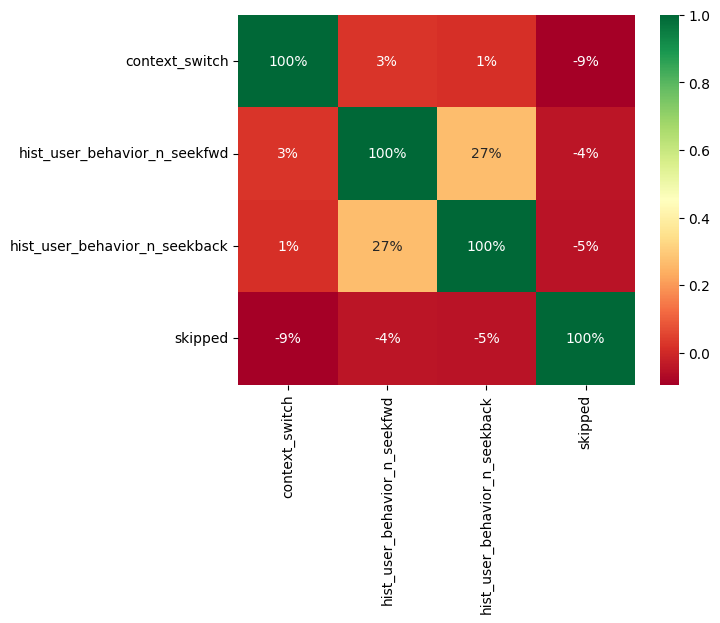

In [ ]:
sns.heatmap(df[['context_switch', 'hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback', 'skipped']].corr(),annot = True, cmap = "RdYlGn",fmt='.0%')
plt.show()

As we can see they all have low corr with target variable so , i will drop them.

In [ ]:
df.drop(['context_switch','hist_user_behavior_n_seekfwd','hist_user_behavior_n_seekback'],axis=1,inplace=True)

**We need group track ids having the same session id**

In [ ]:
# Dropping 'track_id' column.
df.drop(["track_id"], axis=1, inplace=True)
# setting index
df['session_position'] = df['session_position'].astype(int) 
df["track_index"] = df["session_position"]
df.set_index(["session_id", "track_index"], inplace=True)
df.sort_index(inplace=True)
df.head()

session_position  \
session_id                             track_index                     
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                           1   
                                       2                           2   
                                       3                           3   
                                       4                           4   
                                       5                           5   

                                                    session_length  \
session_id                             track_index                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                        20   
                                       2                        20   
                                       3                        20   
                                       4                        20   
                                       5                        20   

                                                    no_pause_before_play  \
session_id                             track_index                         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                               0   
                                       2                               1   
                                       3                               1   
                                       4                               1   
                                       5                               1   

                                                    short_pause_before_play  \
session_id                             track_index                            
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                  0   
                                       2                                  0   
                                       3                                  0   
                                       4                                  0   
                                       5                                  0   

                                                    long_pause_before_play  \
session_id                             track_index                           
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                 0   
                                       2                                 0   
                                       3                                 0   
                                       4                                 0   
                                       5                                 0   

                                                    hist_user_behavior_is_shuffle  \
session_id                             track_index                                  
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                     True   
                                       2                                     True   
                                       3                                     True   
                                       4                                     True   
                                       5                                     True   

                                                    hour_of_day       date  \
session_id                             track_index                           
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                     16 2018-07-15   
                                       2                     16 2018-07-15   
                                       3                     16 2018-07-15   
                                       4                     16 2018-07-15   
                                       5                     16 2018-07-15   

                                                    premium  \
session_id                             track_index            
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1               True   
                                       2               True   
                           

# Handling Outliers

<Axes: >

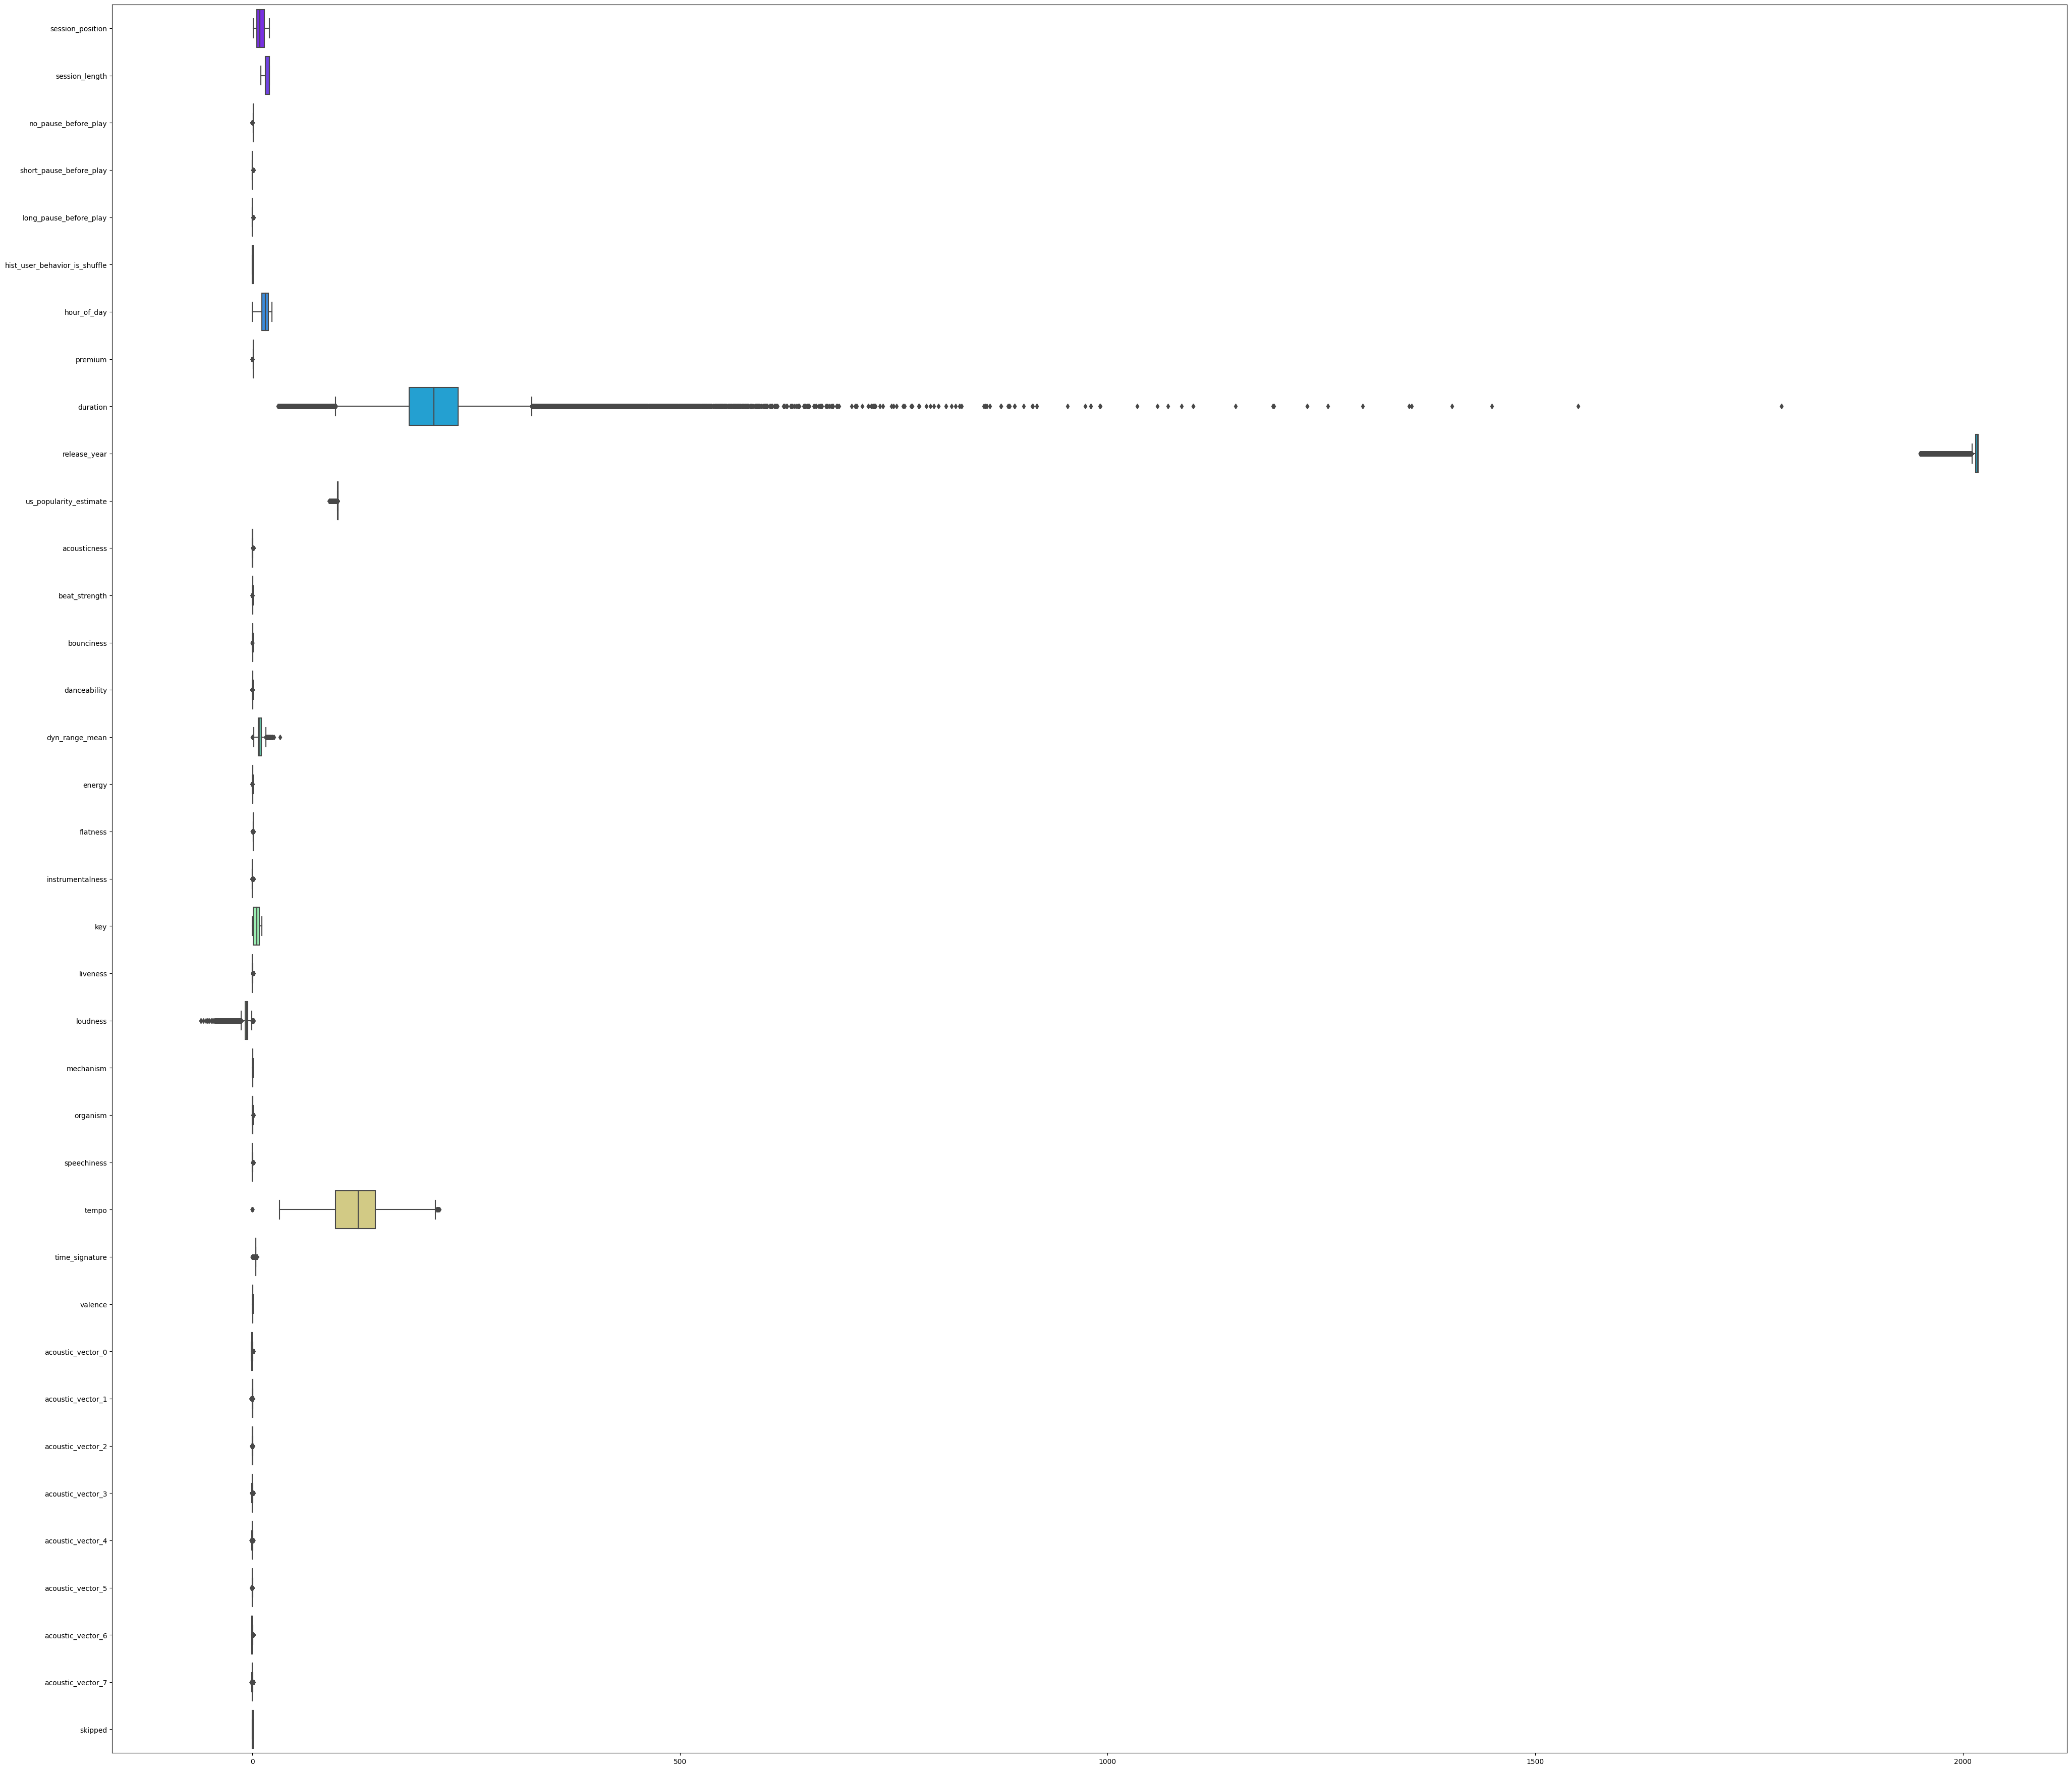

In [ ]:
plt.figure(figsize= (50,45))
sns.boxplot(data=df,palette='rainbow',orient='h')

Splitting data to numeriacl features to remove outliers

In [ ]:
df_numerical=df.select_dtypes(include=np.number)

In [ ]:
for col in df_numerical:
   if (len(df[col].unique()) != 2) :#remove outliers only from numerical columns as some columns are binary
    # calculate interquartile range
    q25, q75 = np.percentile(df[col], 25), np.percentile(df[col], 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = ( ( df[col] < lower) | (df[col] > upper) )
    df[col] =np.where(df[col].values>upper,upper,df[col].values)
    df[col] =np.where(df[col].values<lower,lower,df[col].values)
    index_label = df[outliers].index
    print(f'Number of outliers in {col}: {len(index_label)}')
    
    

Number of outliers in session_position: 0
Number of outliers in session_length: 0
Number of outliers in hour_of_day: 0
Number of outliers in duration: 8520
Number of outliers in release_year: 26399
Number of outliers in us_popularity_estimate: 27537
Number of outliers in acousticness: 7463
Number of outliers in beat_strength: 120
Number of outliers in bounciness: 45
Number of outliers in danceability: 1311
Number of outliers in dyn_range_mean: 743
Number of outliers in energy: 1660
Number of outliers in flatness: 4730
Number of outliers in instrumentalness: 36170
Number of outliers in key: 0
Number of outliers in liveness: 10369
Number of outliers in loudness: 7220
Number of outliers in mechanism: 0
Number of outliers in organism: 1577
Number of outliers in speechiness: 4928
Number of outliers in tempo: 53
Number of outliers in time_signature: 10779
Number of outliers in valence: 0
Number of outliers in acoustic_vector_0: 215
Number of outliers in acoustic_vector_1: 16875
Number of out

# Let's take a look on our categoricl Features

In [ ]:
df_categorical_features = df.select_dtypes(include='object')


In [ ]:
df_categorical_features.head()


context_type  \
session_id                             track_index                       
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1            editorial_playlist   
                                       2            editorial_playlist   
                                       3            editorial_playlist   
                                       4            editorial_playlist   
                                       5            editorial_playlist   

                                                   hist_user_behavior_reason_start  \
session_id                             track_index                                   
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                                 trackdone   
                                       2                                 trackdone   
                                       3                                 trackdone   
                                       4                                 trackdone   
                                       5                                 trackdone   

                                                   hist_user_behavior_reason_end  \
session_id                             track_index                                 
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1                               trackdone   
                                       2                               trackdone   
                                       3                               trackdone   
                                       4                               trackdone   
                                       5                               trackdone   

                                                     mode  
session_id                             track_index         
0_00006f66-33e5-4de7-a324-2d18e439fc1e 1            major  
                                       2            minor  
                                       3            major  
                                       4            major  
                                       5            major

In [ ]:
for col in df_categorical_features:
  print(col ,df_categorical_features[col].unique())
  print('\n')

context_type ['editorial_playlist' 'user_collection' 'radio' 'personalized_playlist'
 'catalog' 'charts']


hist_user_behavior_reason_start ['trackdone' 'fwdbtn' 'backbtn' 'clickrow' 'appload' 'playbtn' 'remote'
 'trackerror' 'endplay']


hist_user_behavior_reason_end ['trackdone' 'fwdbtn' 'backbtn' 'endplay' 'logout' 'remote' 'clickrow']


mode ['major' 'minor']




**I will encode them but fisrt let have same insights with target variable.**

In [ ]:
import plotly.express as ex
ex.pie(df,names='skipped',title='Song Skip Status',hole=0.20)

# Mode

Text(0, 0.5, 'Count')

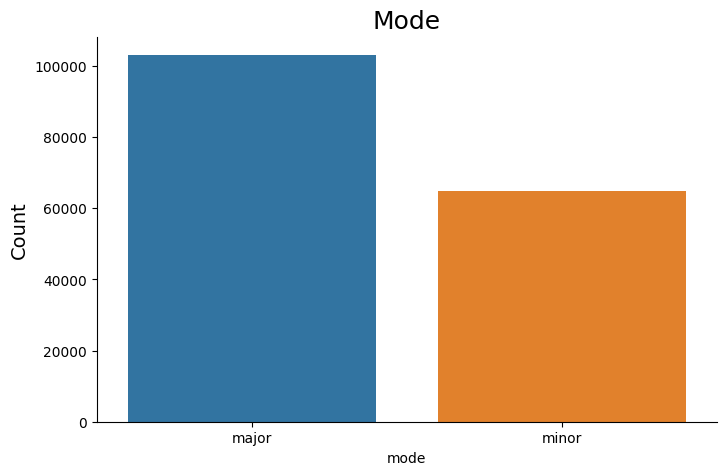

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="mode", data=df)
sns.despine()
plt.title("Mode", fontsize = 18)
plt.ylabel("Count", fontsize = 14)

# Context Type

Text(0, 0.5, 'Count')

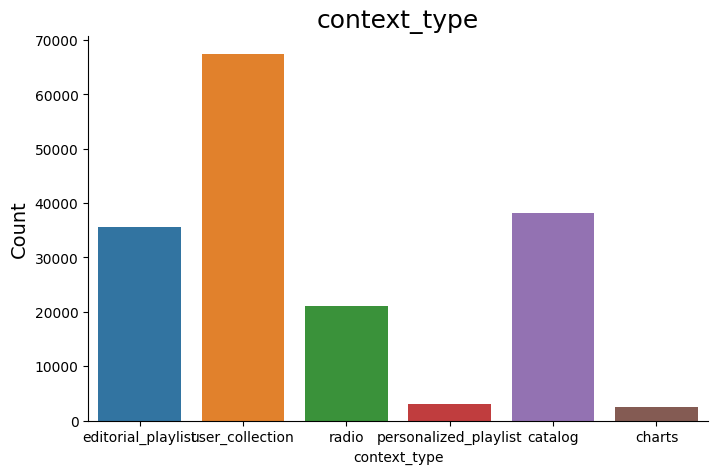

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="context_type", data=df)
sns.despine()
plt.title("context_type", fontsize = 18)
plt.ylabel("Count", fontsize = 14)

# Reason to Start music Session or end it

Text(0, 0.5, 'Count')

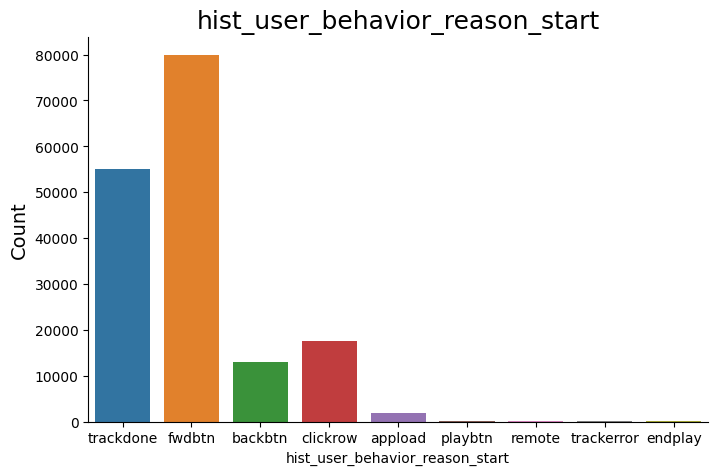

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="hist_user_behavior_reason_start", data=df)
sns.despine()
plt.title("hist_user_behavior_reason_start", fontsize = 18)
plt.ylabel("Count", fontsize = 14)

Text(0, 0.5, 'Count')

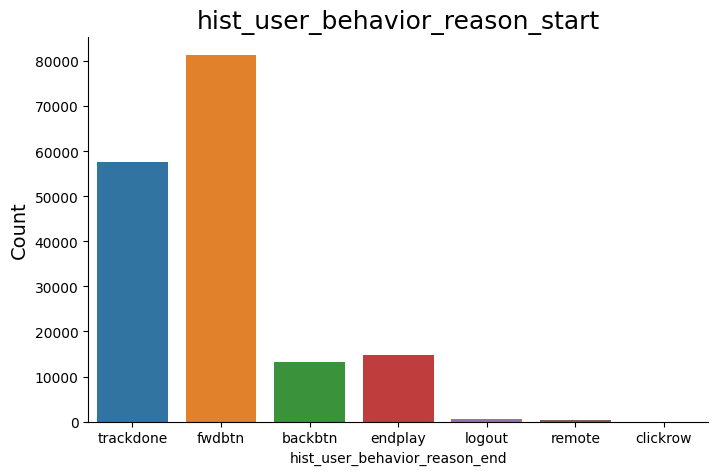

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x="hist_user_behavior_reason_end", data=df)
sns.despine()
plt.title("hist_user_behavior_reason_start", fontsize = 18)
plt.ylabel("Count", fontsize = 14)

Text(0.5, 1.0, 'Releation bet skipping track and session position')

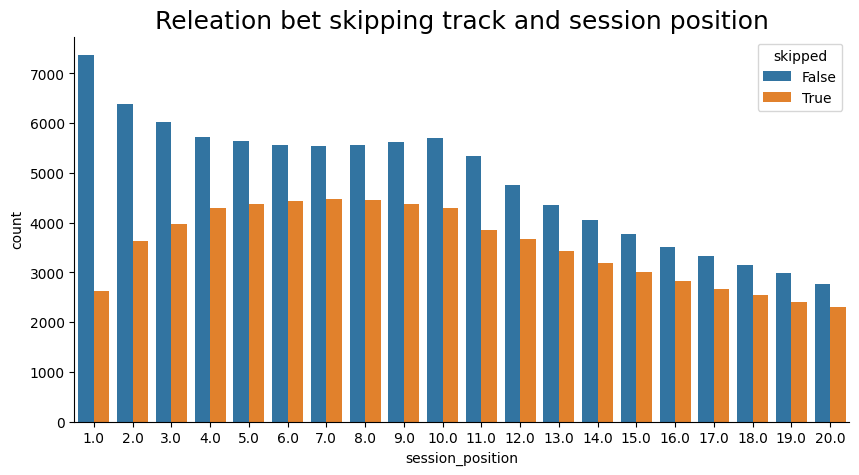

In [ ]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x="session_position",hue='skipped' ,data=df)
sns.despine()
plt.title("Releation bet skipping track and session position", fontsize = 18)


Sesion position 1 has least amount of skips , track skips vary among session positions.

Text(0.5, 1.0, 'skipping track and context_type')

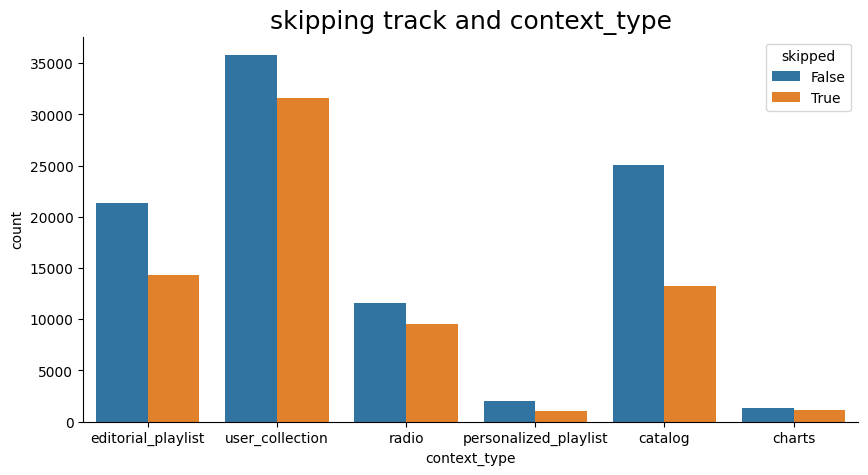

In [ ]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x="context_type",hue='skipped' ,data=df)
sns.despine()
plt.title("skipping track and context_type", fontsize = 18)


Text(0.5, 1.0, 'skipping track and premium subsription')

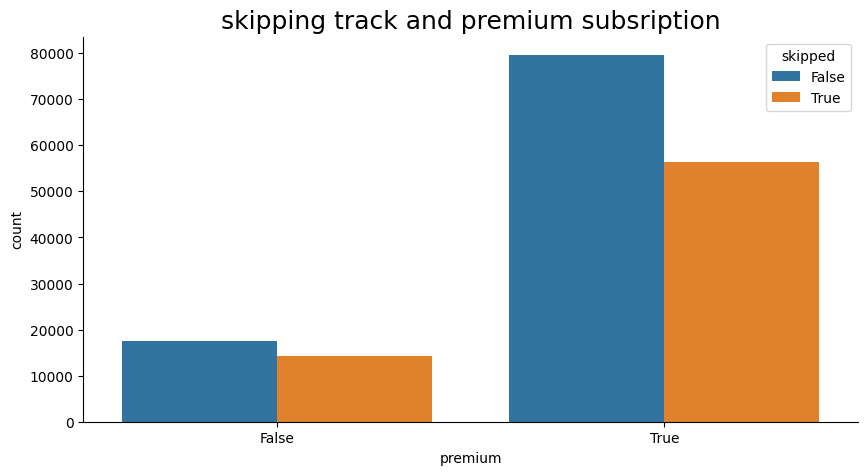

In [ ]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x="premium",hue='skipped' ,data=df)
sns.despine()
plt.title("skipping track and premium subsription", fontsize = 18)


Text(0.5, 1.0, 'skipping track and hist_user_behavior_reason_start')

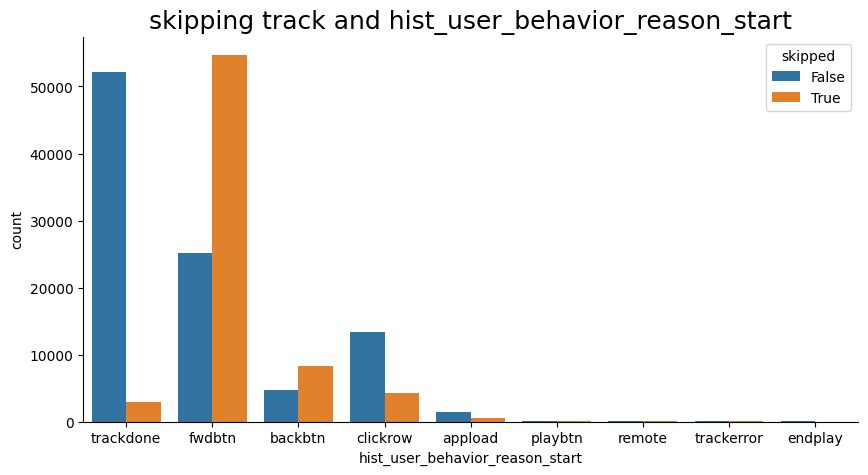

In [ ]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x="hist_user_behavior_reason_start",hue='skipped' ,data=df)
sns.despine()
plt.title("skipping track and hist_user_behavior_reason_start", fontsize = 18)


Text(0.5, 1.0, 'skipping track and hour_of_day')

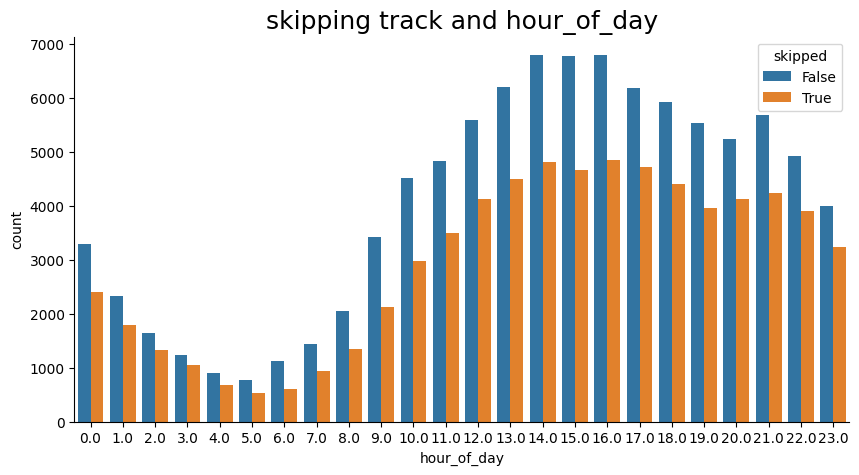

In [ ]:
plt.figure(figsize=(10, 5))
g = sns.countplot(x="hour_of_day",hue='skipped' ,data=df)
sns.despine()
plt.title("skipping track and hour_of_day", fontsize = 18)



# Encoding

In [ ]:
preprocessing.LabelEncoder()
label_encoder = preprocessing.LabelEncoder() 
# Encode labels 
df['mode']= label_encoder.fit_transform(df['mode'])
#df['context_switch']=label_encoder.fit_transform(df['context_switch'])
#df['skipped']=label_encoder.fit_transform(df['skipped'])

In [ ]:
df=pd.get_dummies(df,columns=['context_type','hist_user_behavior_reason_start','hist_user_behavior_reason_end'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 167880 entries, ('0_00006f66-33e5-4de7-a324-2d18e439fc1e', 1) to ('0_0eaeef5d-25e9-4429-bd55-af15d3604c9f', 20)
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype         
---  ------                                      --------------   -----         
 0   session_position                            167880 non-null  float64       
 1   session_length                              167880 non-null  float64       
 2   no_pause_before_play                        167880 non-null  int64         
 3   short_pause_before_play                     167880 non-null  int64         
 4   long_pause_before_play                      167880 non-null  int64         
 5   hist_user_behavior_is_shuffle               167880 non-null  bool          
 6   hour_of_day                                 167880 non-null  float64       
 7   date                                        167880 non-null  datetime64

# Feature Engineering

# Feature Creation

I have had a problem with date column in scaling and also in pca so i found best solution is to create a new feature called week days and remove date column.

In [ ]:
df['day'] = df["date"].dt.dayofweek
df.drop("date", inplace=True, axis=1)

## Feature Scaling



First Let's take a look on our numerical features.

In [ ]:
df_numerical2=df.select_dtypes(include=np.number)#Extract only numerical features

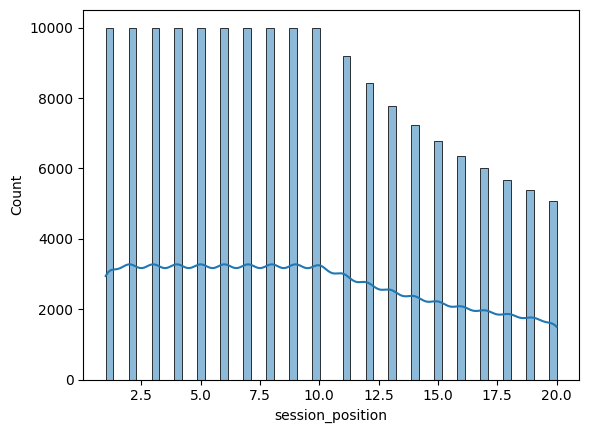

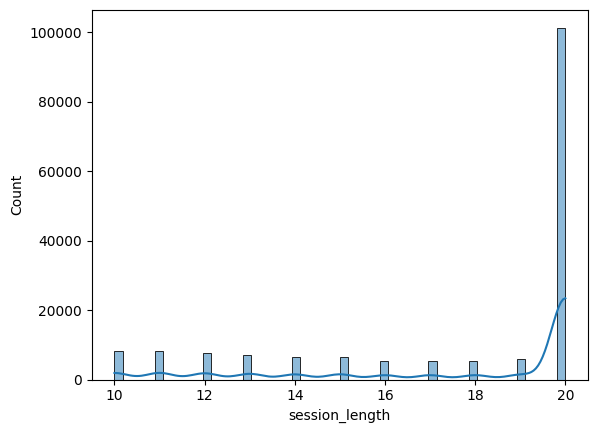

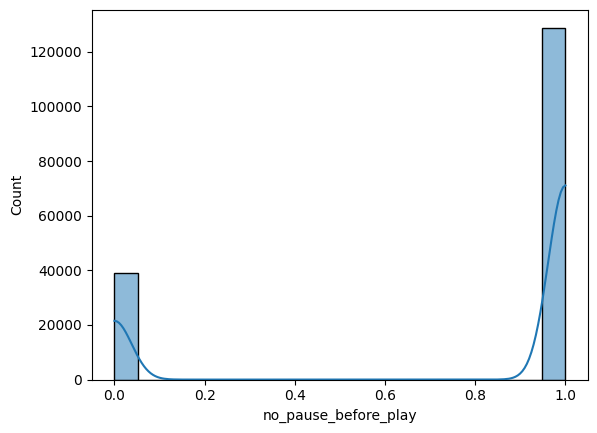

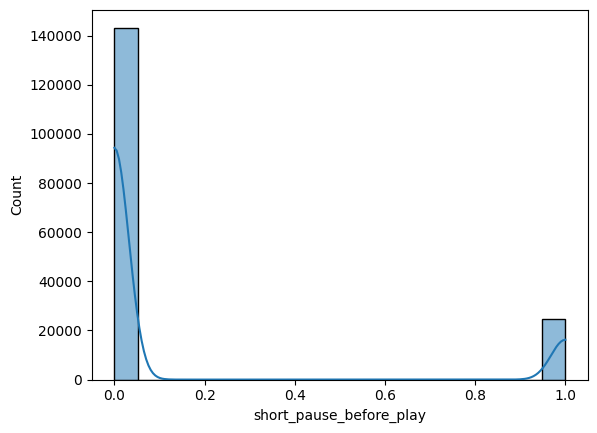

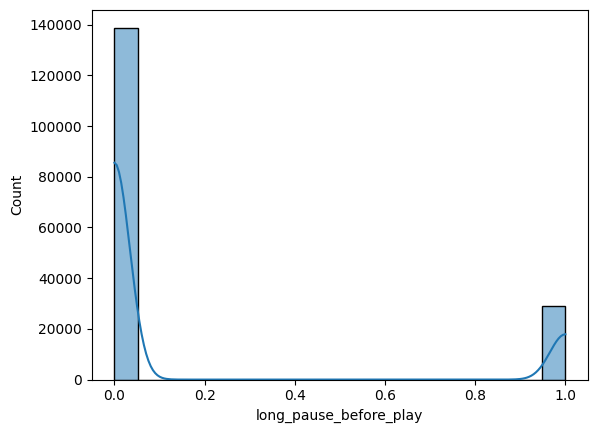

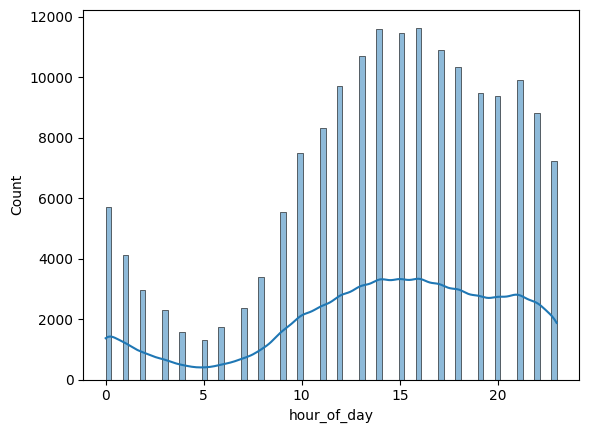

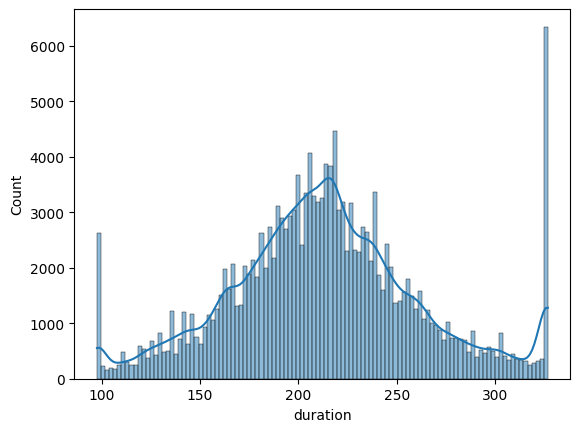

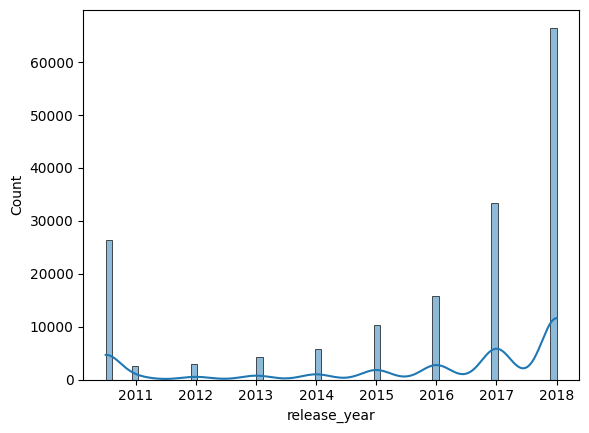

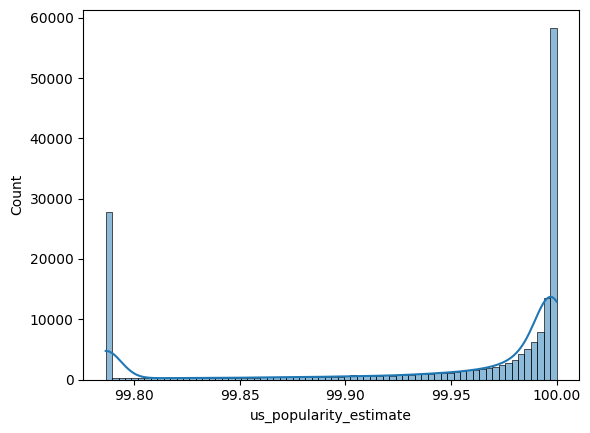

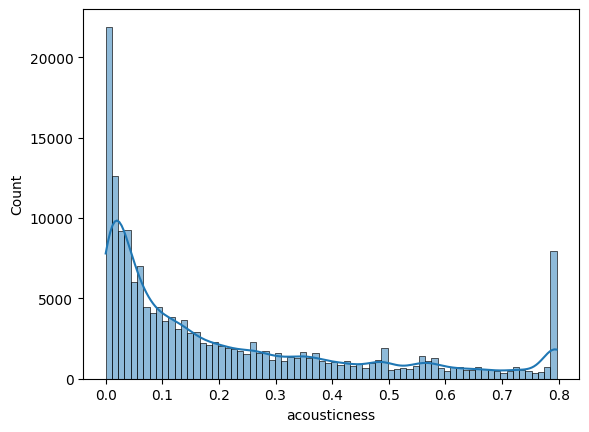

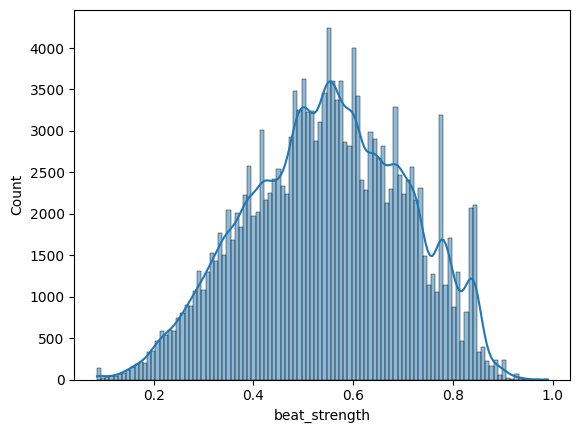

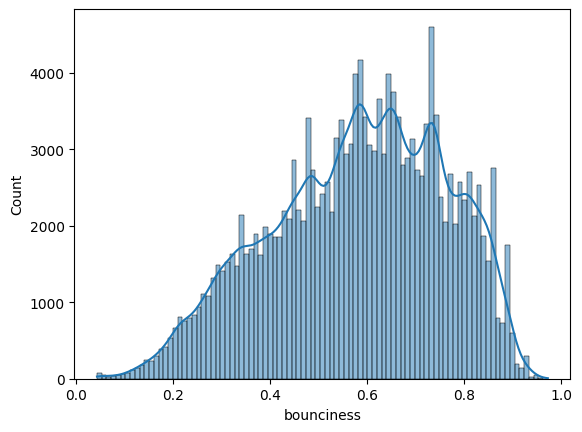

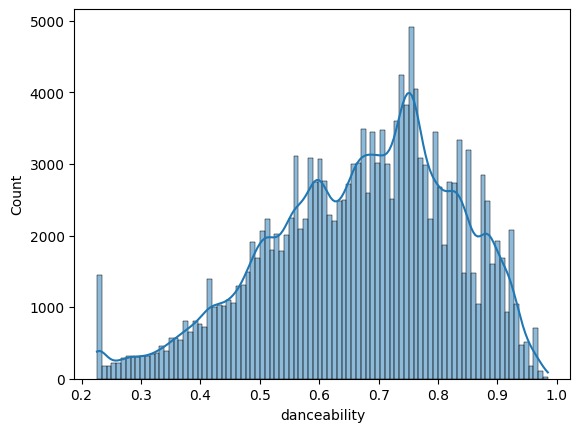

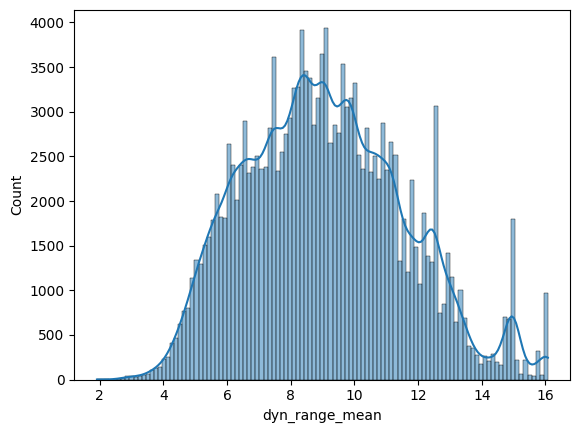

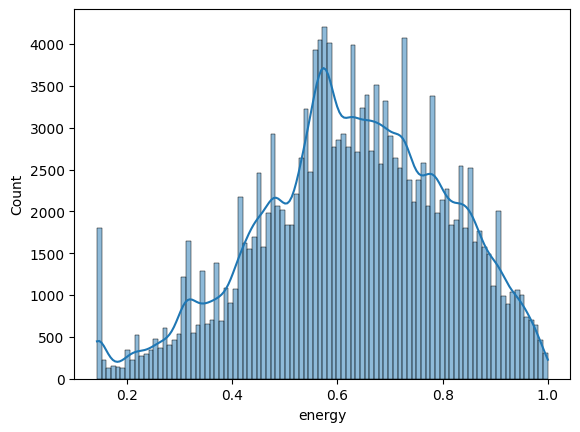

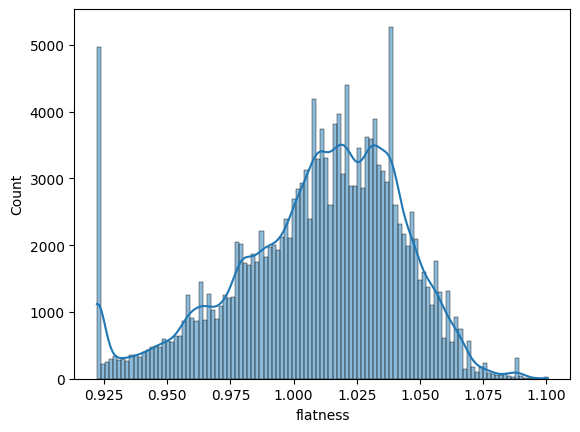

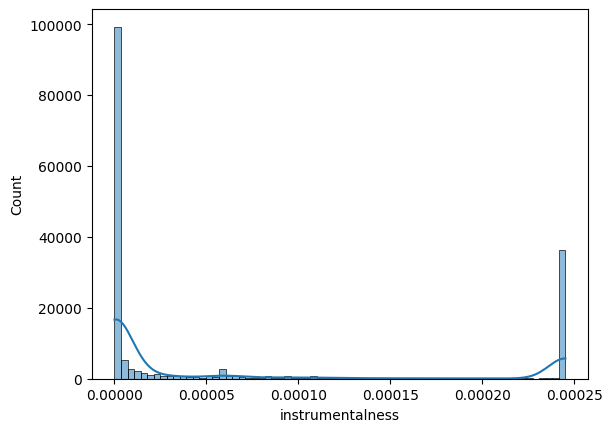

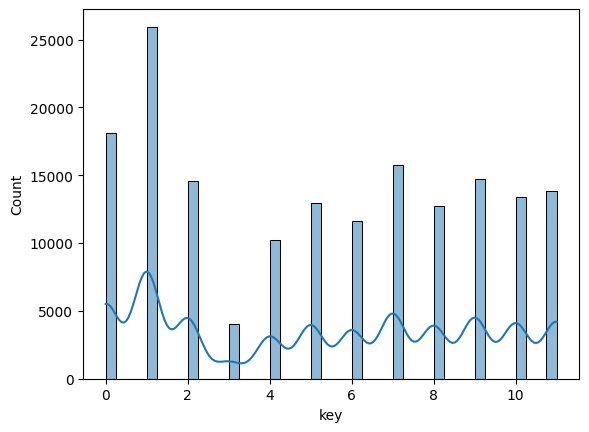

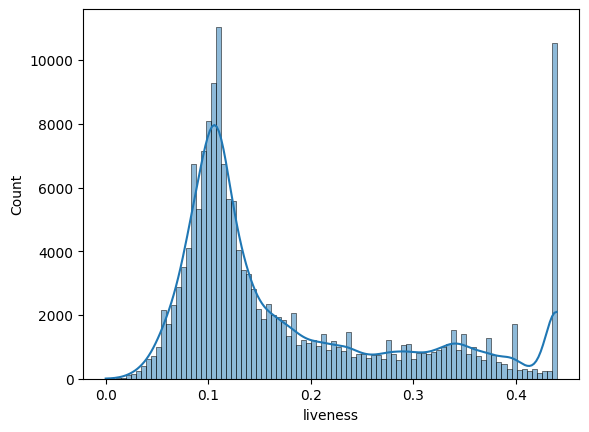

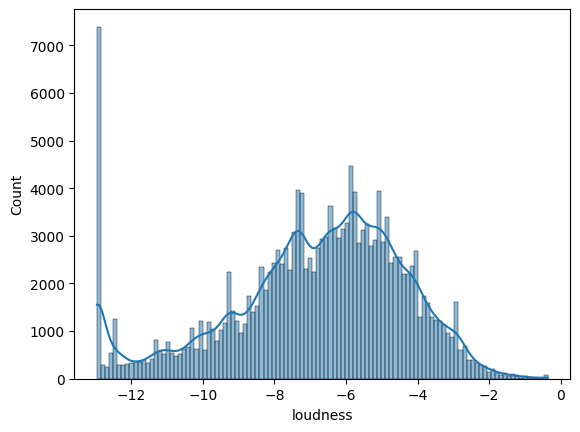

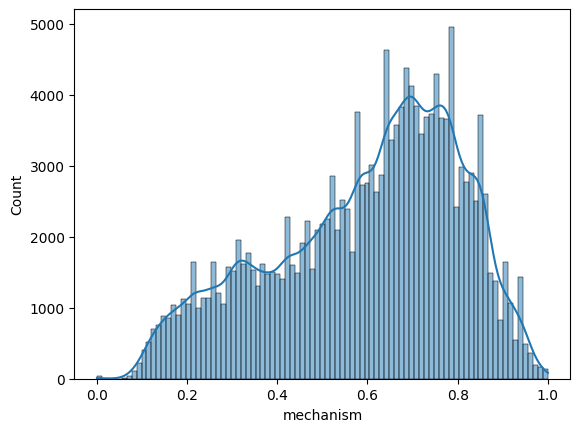

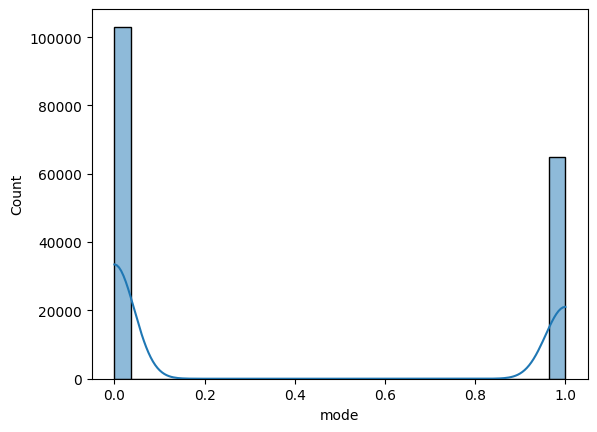

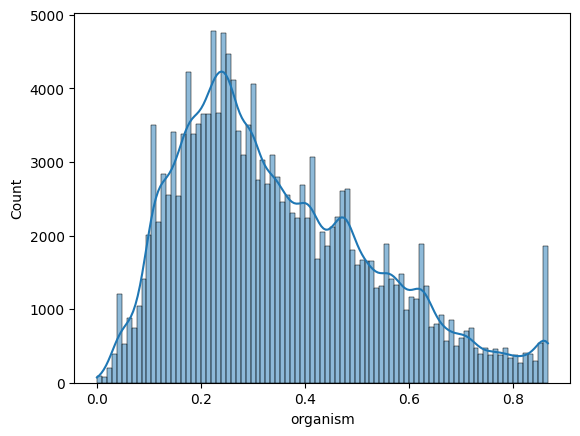

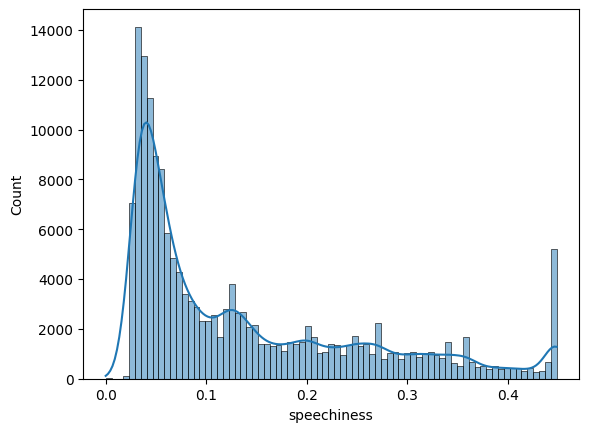

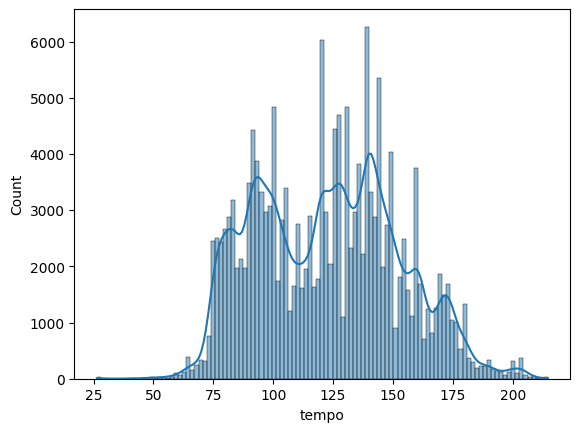

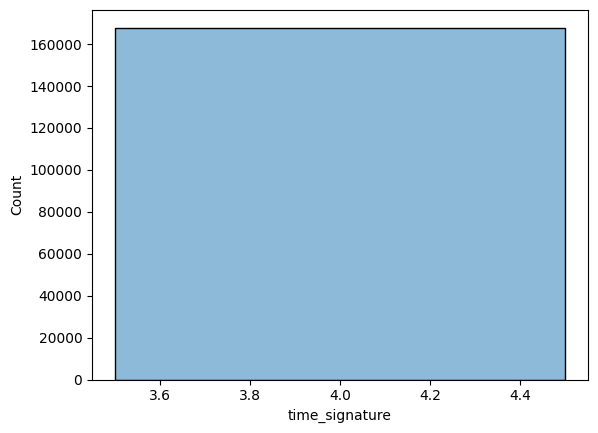

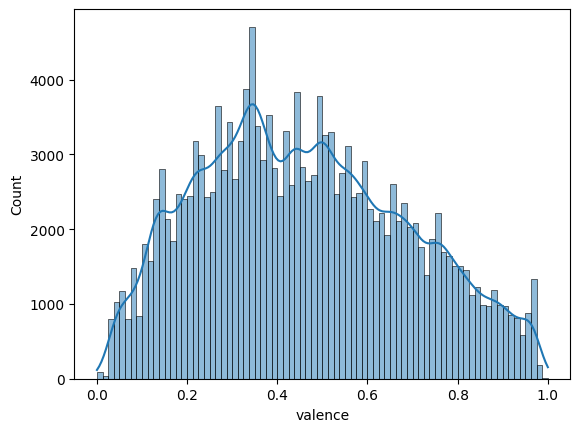

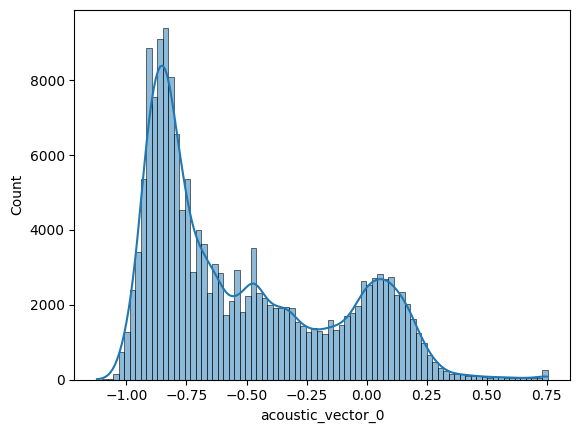

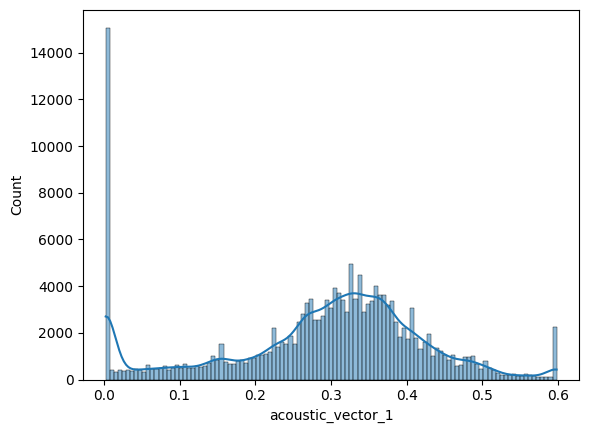

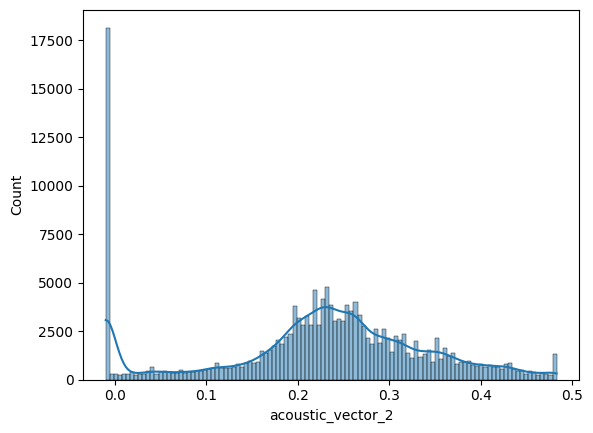

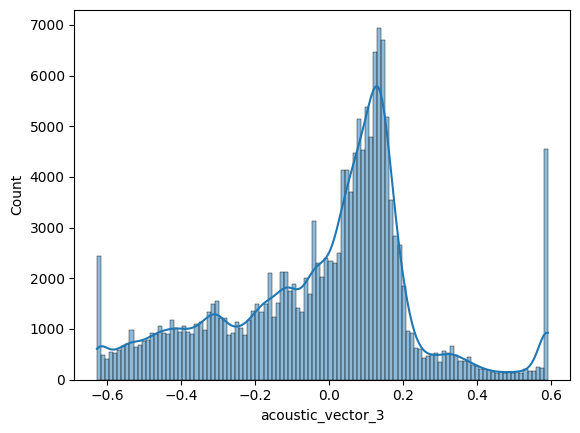

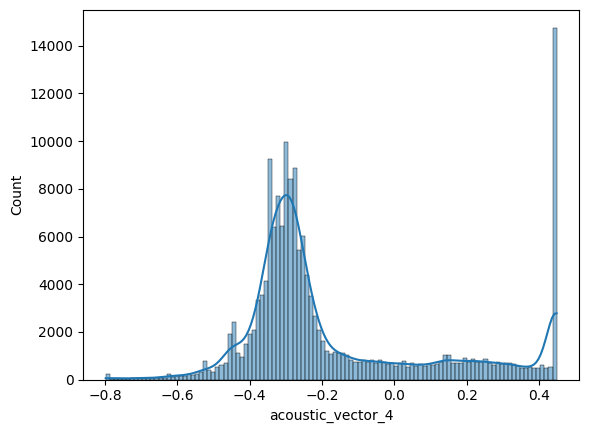

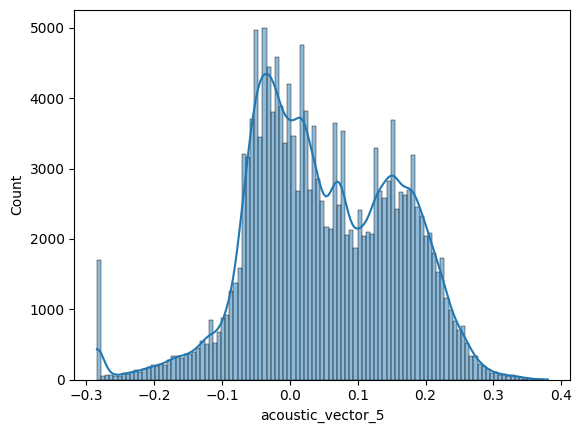

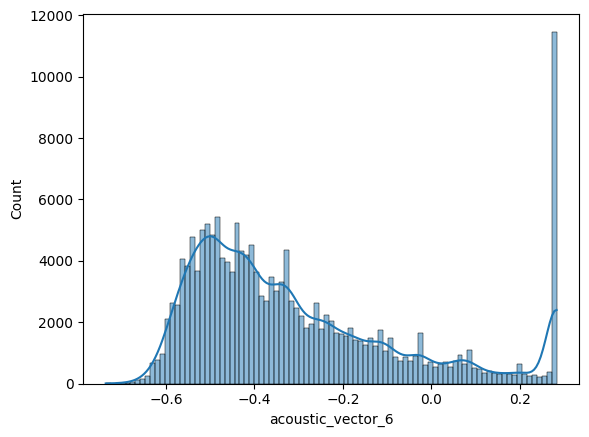

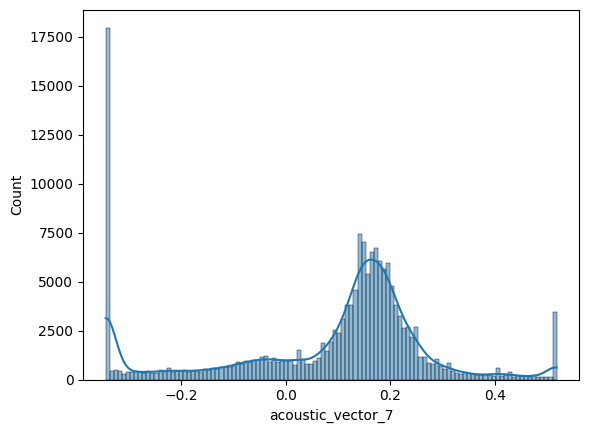

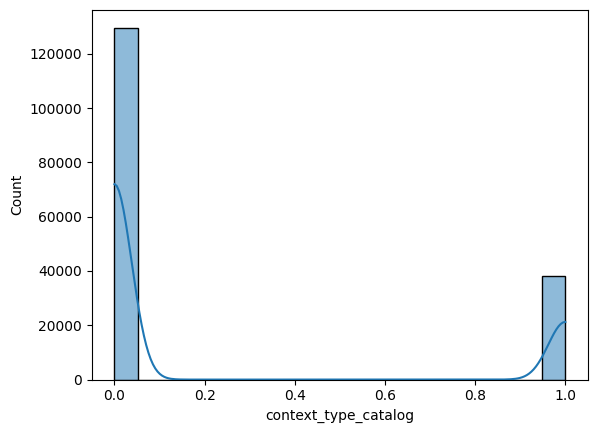

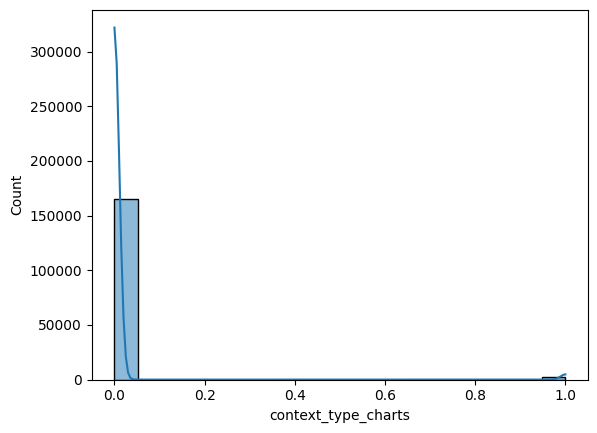

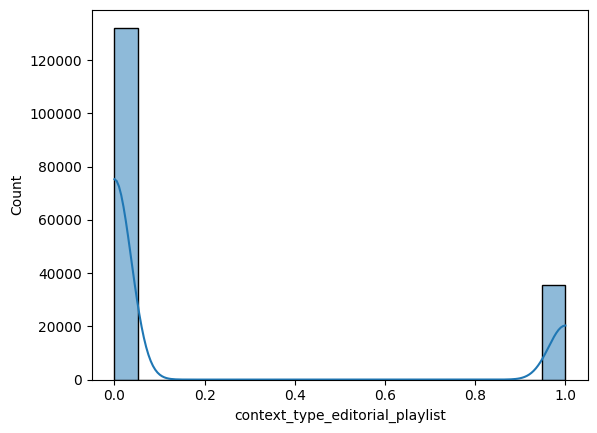

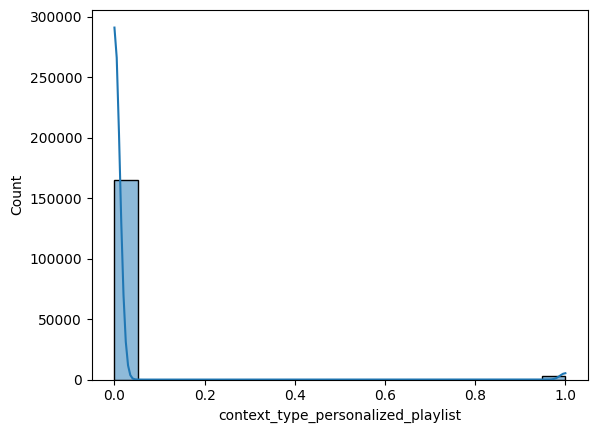

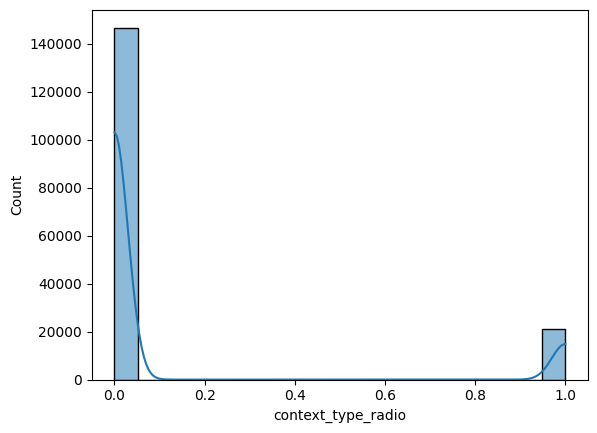

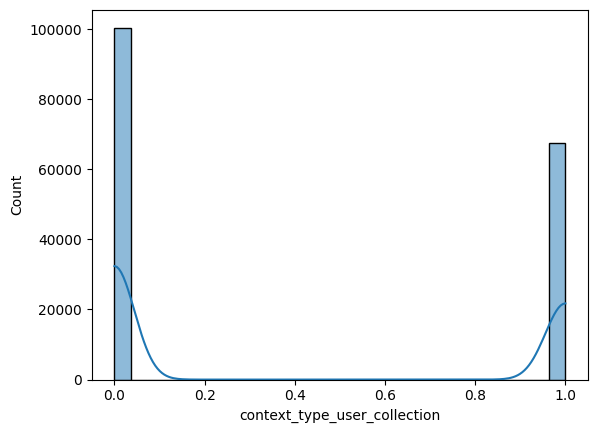

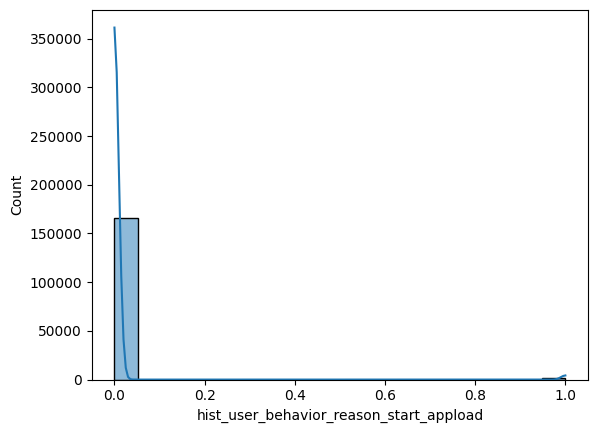

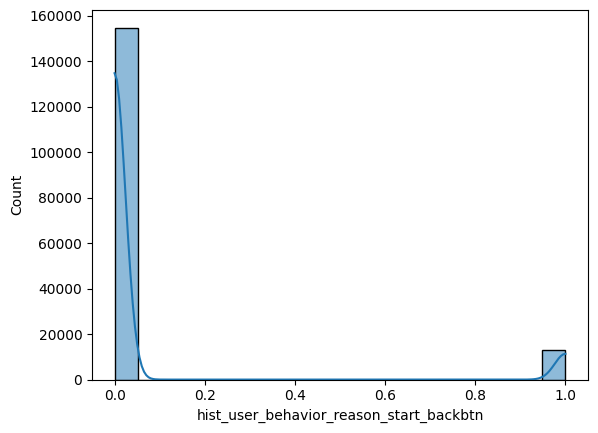

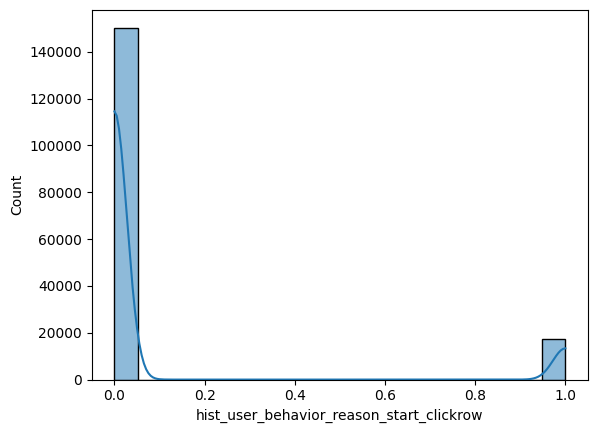

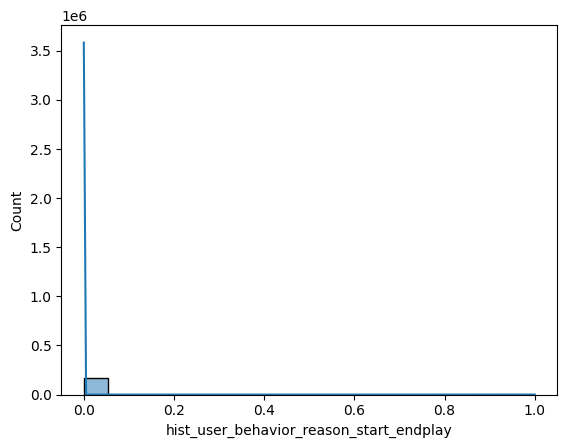

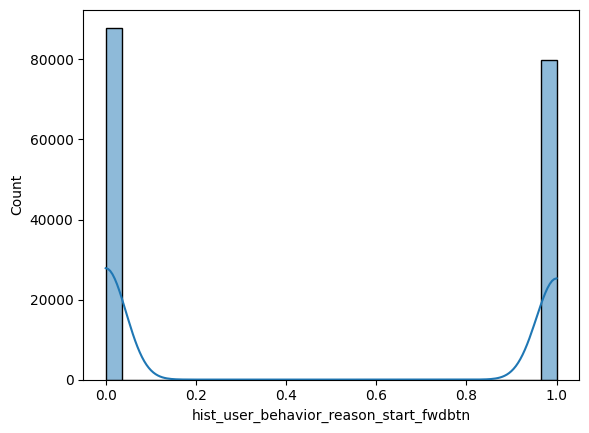

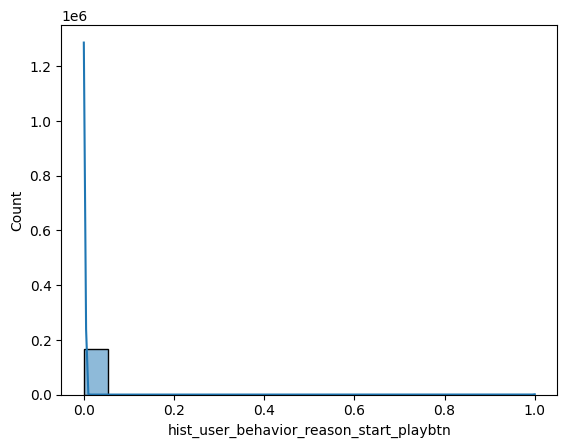

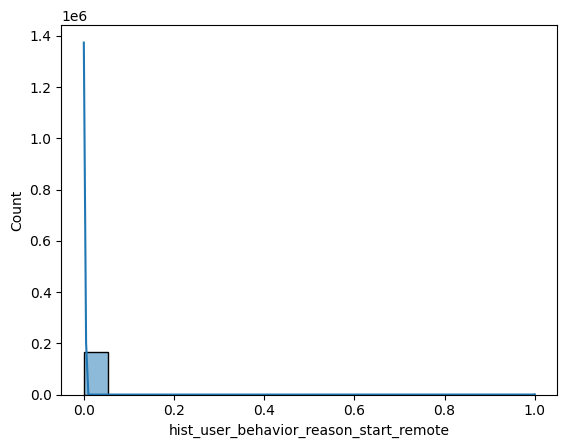

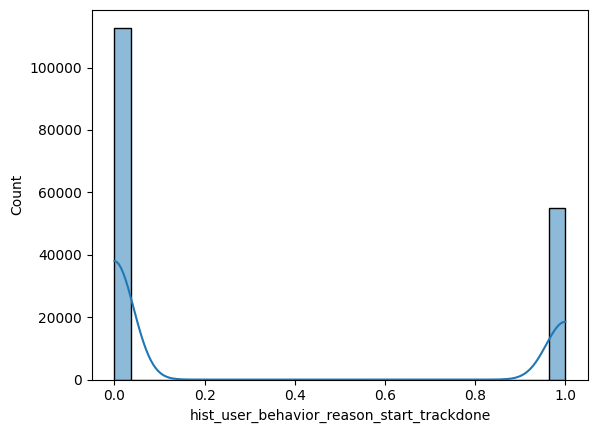

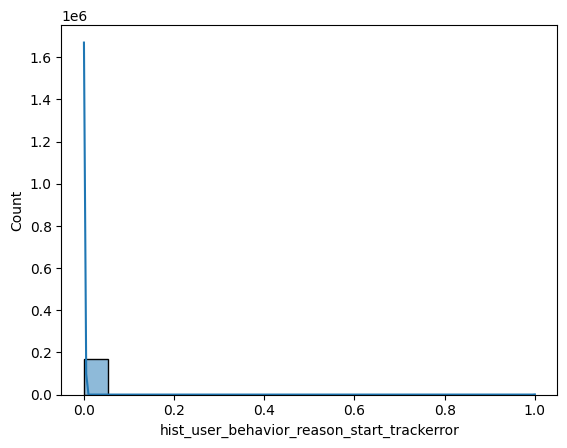

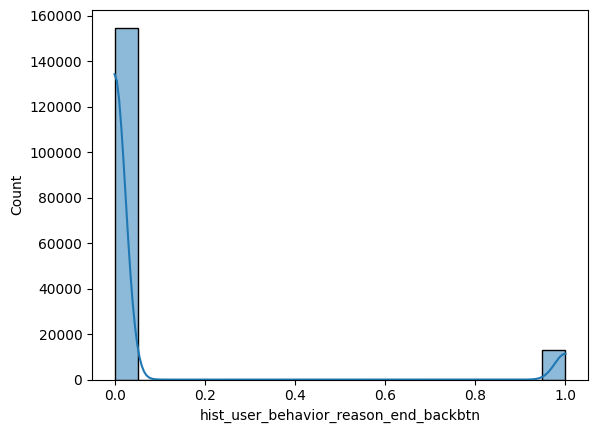

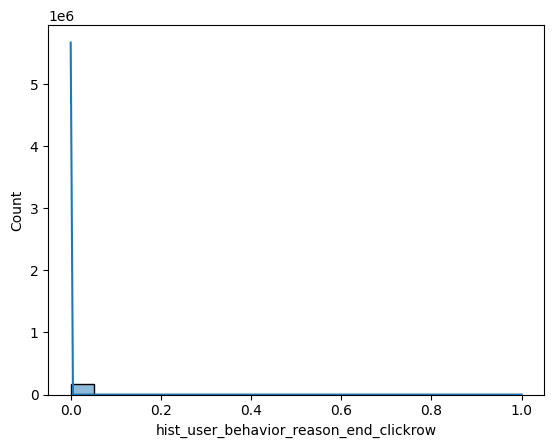

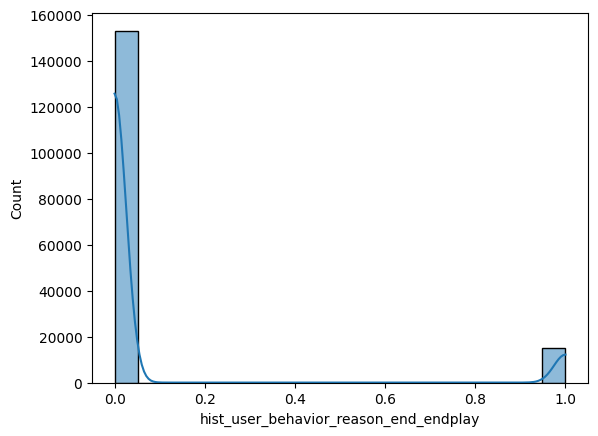

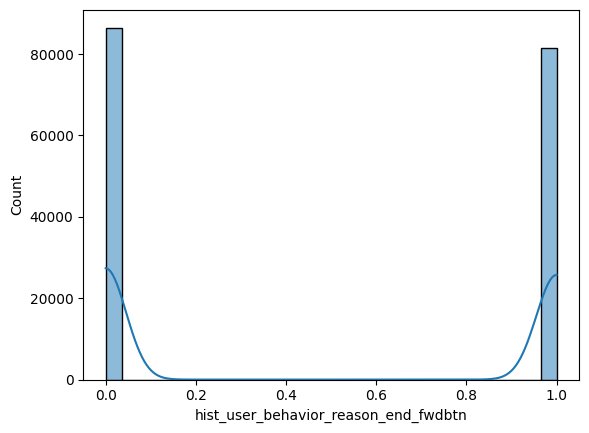

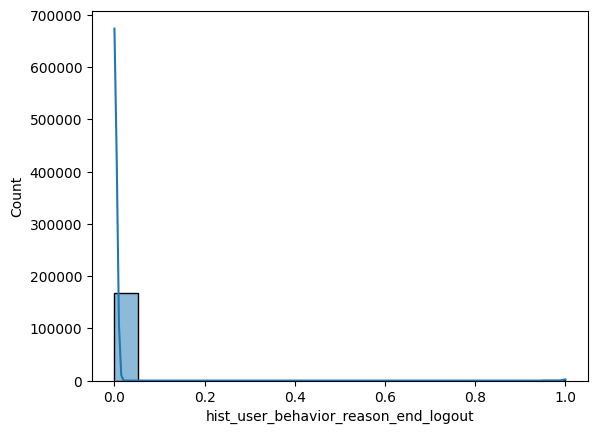

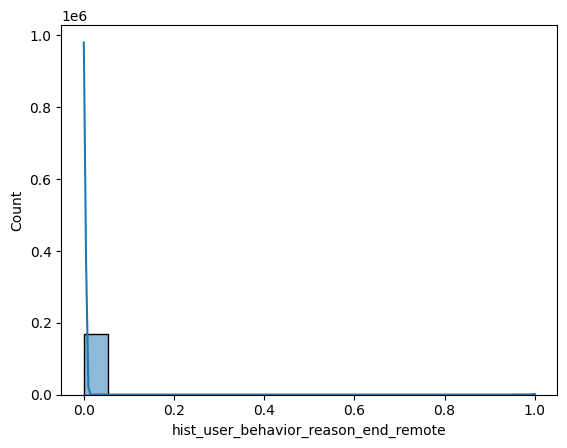

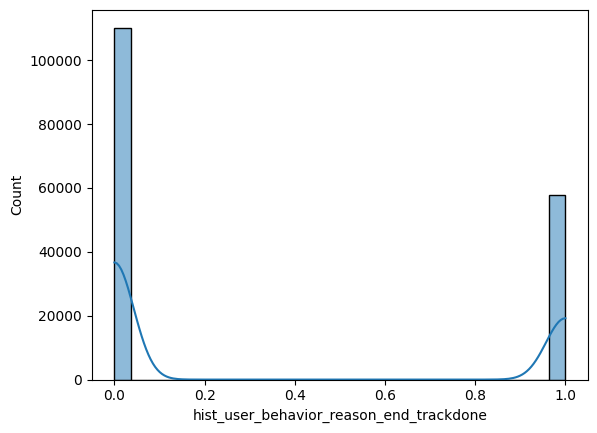

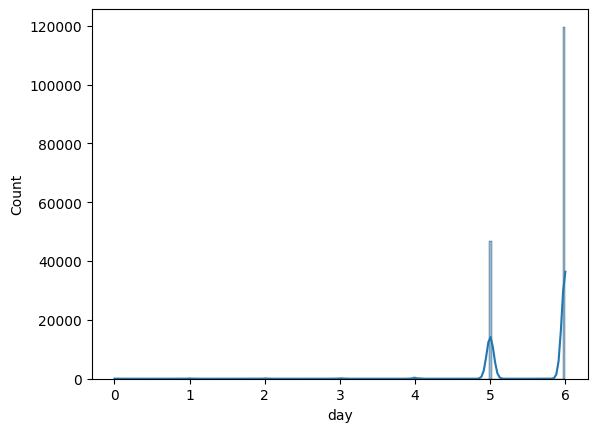

In [ ]:
for col in df_numerical2:
    sns.histplot(df[col], kde = True)
    plt.show()

In [ ]:
df_numerical2=df.select_dtypes(include=np.number)

In [ ]:
#Now we have dataset_SCALED which is a copy of our normal dataset but scaled as an array
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_SCALED=df.copy()
for col in df_numerical2:
  if (len(df[col].unique()) != 2) :
    df_SCALED[col]=scaler.fit_transform(df[[col]])

# -Feature Selection

Let's check corr between features and target variable.

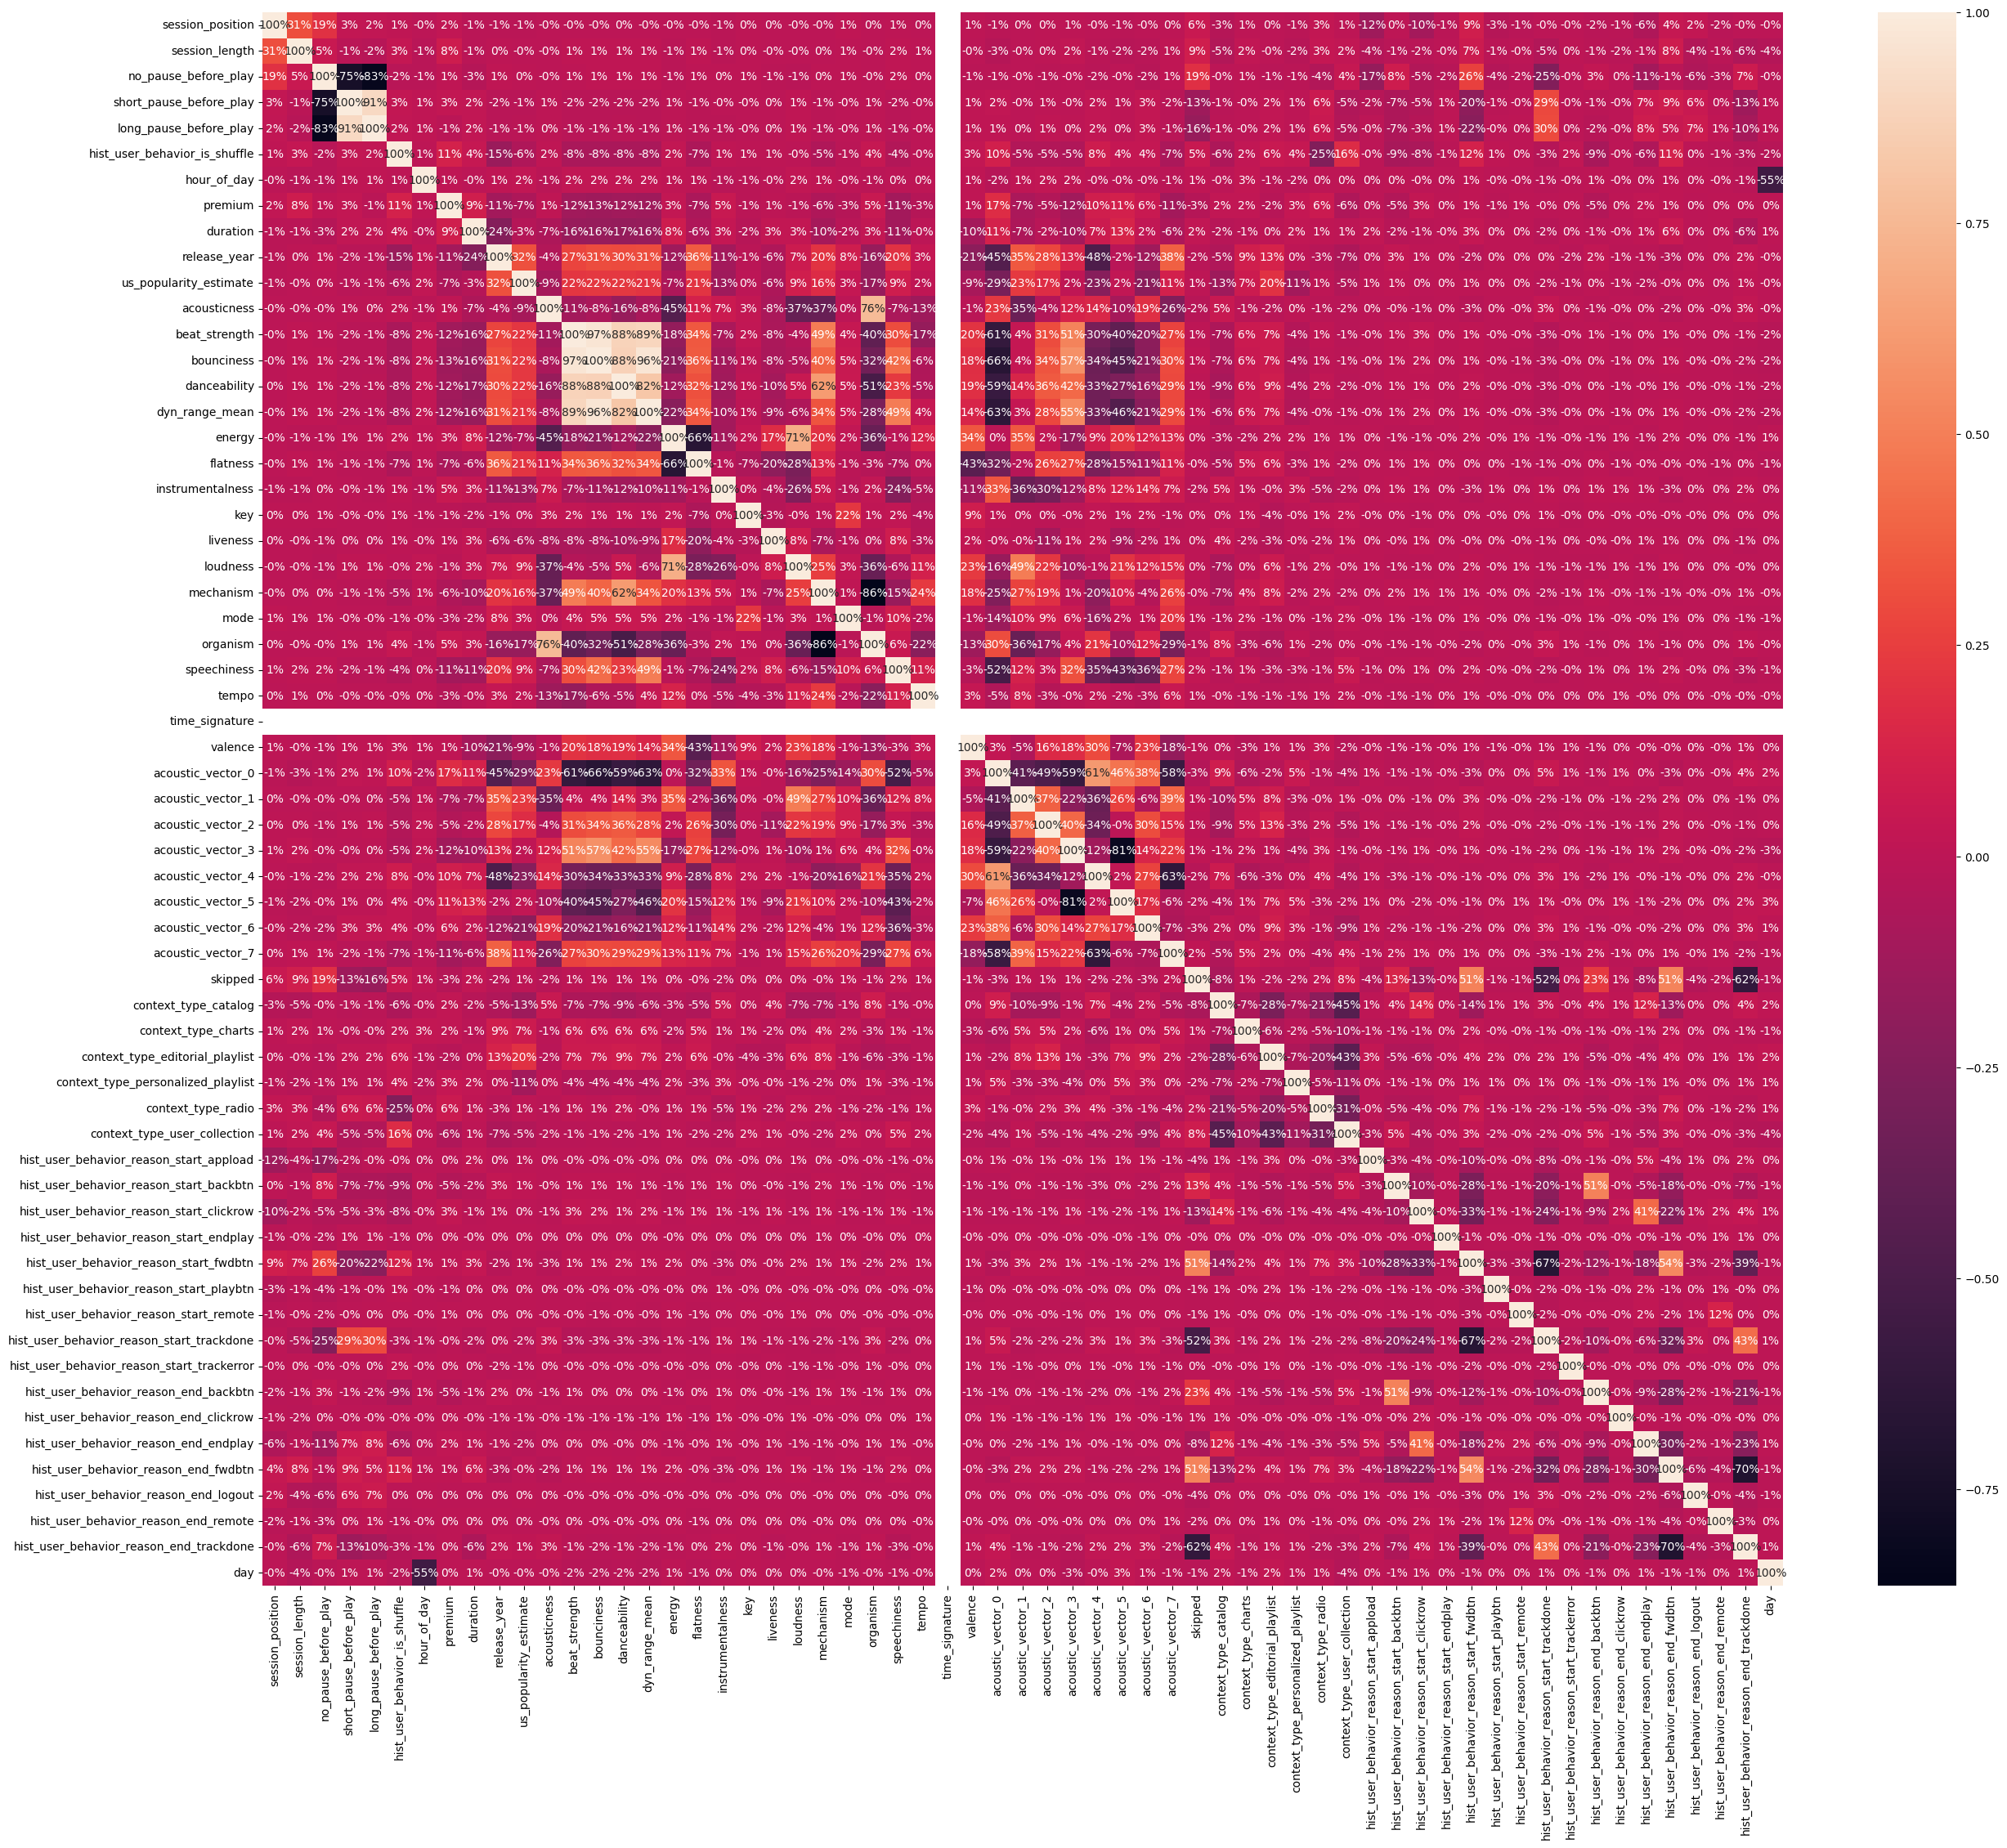

In [ ]:
#Correlation using heatmap
plt.figure(figsize = (30, 25))
sns.heatmap(df_SCALED.corr(), annot = True, fmt='.0%')
plt.show()

*   As mentioned in track features analysis it was found that beat_strength,bounciness,danceability,dyn_range_mean have high corr among each other so , i will drop them leaving bounciness having the highest corr with target variable which is equal to 30%.

*   short_pause_before_play ,long_pause_before_play,no_pause_before_play having high corr among each other so, i will drop short_pause_before_play ,long_pause_before_play and leave no_pause_before_play as it have the highest corr with target variable(Skipped).



In [ ]:
df_SCALED.drop(['beat_strength','danceability','dyn_range_mean', "long_pause_before_play"],inplace=True,axis=1)

In [ ]:
df_SCALED.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 167880 entries, ('0_00006f66-33e5-4de7-a324-2d18e439fc1e', 1) to ('0_0eaeef5d-25e9-4429-bd55-af15d3604c9f', 20)
Data columns (total 57 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   session_position                            167880 non-null  float64
 1   session_length                              167880 non-null  float64
 2   no_pause_before_play                        167880 non-null  int64  
 3   short_pause_before_play                     167880 non-null  int64  
 4   hist_user_behavior_is_shuffle               167880 non-null  bool   
 5   hour_of_day                                 167880 non-null  float64
 6   premium                                     167880 non-null  bool   
 7   duration                                    167880 non-null  float64
 8   release_year                                167880 non-null 

* I will pass all independent features we have right now to logistic regression model.
* Then i will filter out the features based on feature importance .


# Split into x and Y

In [ ]:
X=df_SCALED.loc[:, df_SCALED.columns != "skipped"]

In [ ]:
Y=df_SCALED["skipped"]

# Train test Split

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=44,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score
reg = LogisticRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
accuracy_score(y_test, y_pred)

0.8693114129139862

# feature_importance

In [ ]:
def get_feature_importance(clf, feature_names) :
    feature_importance =(
       pd.DataFrame(
           {
                   'variable' :feature_names, # Feature names
                    'coefficient':clf.coef_[0] # Feature Coeficients
           }
       )
       .round(decimals=2)\
       .sort_values("coefficient", ascending=False) \
       .style.bar(color=['red','green'],align='zero')
    )
    return feature_importance

In [ ]:
get_feature_importance(reg,x_train.columns)

# Selectiong top 20 features having highest feature importance 
* Then pass them to DecisionTree Model

In [ ]:
X_DT=df_SCALED[['hist_user_behavior_reason_end_backbtn','hist_user_behavior_reason_end_fwdbtn','short_pause_before_play','no_pause_before_play','hist_user_behavior_reason_start_fwdbtn','hist_user_behavior_reason_end_clickrow','hist_user_behavior_reason_start_trackerror','bounciness','hist_user_behavior_reason_start_backbtn','hist_user_behavior_reason_end_remote','hist_user_behavior_is_shuffle','context_type_user_collection','hist_user_behavior_reason_start_clickrow','hist_user_behavior_reason_end_endplay','session_length','acoustic_vector_0','us_popularity_estimate','acoustic_vector_3','loudness','acousticness']]

In [ ]:
Y=df_SCALED['skipped']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_DT,Y,random_state=44,test_size=0.2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import  accuracy_score
dtc = DecisionTreeClassifier(max_depth=5,criterion="gini",random_state=44)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8802120562306409

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17073  2419]
 [ 1603 12481]]


<Axes: >

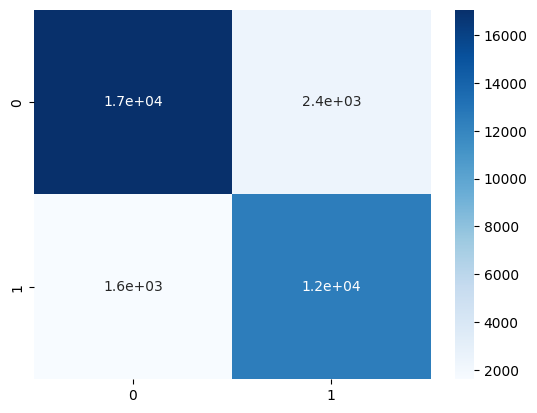

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')

In [ ]:
import pickle
pickle.dump(dtc, open('model_dtc.pkl', 'wb'))

In [ ]:
df_SCALED.to_csv('processed_spotify_data.csv')

# Selecting Features to pass to KNN model

In [ ]:
X_knn=df_SCALED[['hist_user_behavior_reason_end_trackdone','hist_user_behavior_reason_start_trackdone','hist_user_behavior_reason_end_fwdbtn','hist_user_behavior_reason_end_backbtn','hist_user_behavior_reason_end_endplay','hist_user_behavior_reason_start_fwdbtn']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_knn,Y,random_state=44,test_size=0.2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  accuracy_score
knn = KNeighborsClassifier(25)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test, y_pred)

0.876518942101501

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[17203  2289]
 [ 1857 12227]]


<Axes: >

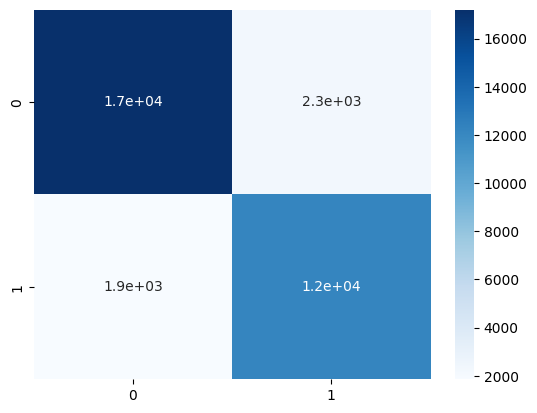

In [ ]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='Blues')